# Contextualização e Objetivos do projeto

Há um risco grande ruptura de clientes que são considerados valiosos para o negócio quando há uma recorrência de experiências negativas comprando na plataforma Olist. Nesse projeto há uma proposta de clusterização de clientes que agregam maior valor para o negócio.

Além disso, a fim de diminuir a probabilidade de ruptura de compras efetuadas pelos clientes de maior valor na plataforma realizou-se uma análise de dados com objetivo de listar os fornecedores e produtos que causam maiores experiencias negativas para os clientes de maior valor para o negócio.

Entende-se como uma experiência negativa a compra de um produto que não corresponde as expectativas do cliente. Esse indicador foi mensurado inferindo uma avaliação de produtos por fornecedor a partir da resposta do questionário de avaliação de pedidos.

Em resumo esse projeto se propõe á

1) Criar um modelo de agrupamento de clientes a fim de identificar os clientes de maior valor para o negócio;  
2) Criar uma metodologia para avaliação de produtos por fornecedor a a partir da resposta do questionário de avaliação de pedidos;  
3) Contabilizar o número de ocorrências de baixas avaliações pelo conjunto produto-fornecedor com a finalidade de notificá-los;  
4) Otimizar as operações de notificações, propondo uma metodologia para priorização. Para isso será realizado o levantamento do preço unitário dos produtos por fornecedor e da relação Frete/distancia cliente-fornecedor;  



In [1]:
##Olist
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
!pip install tqdm

In [3]:
from tqdm import tqdm

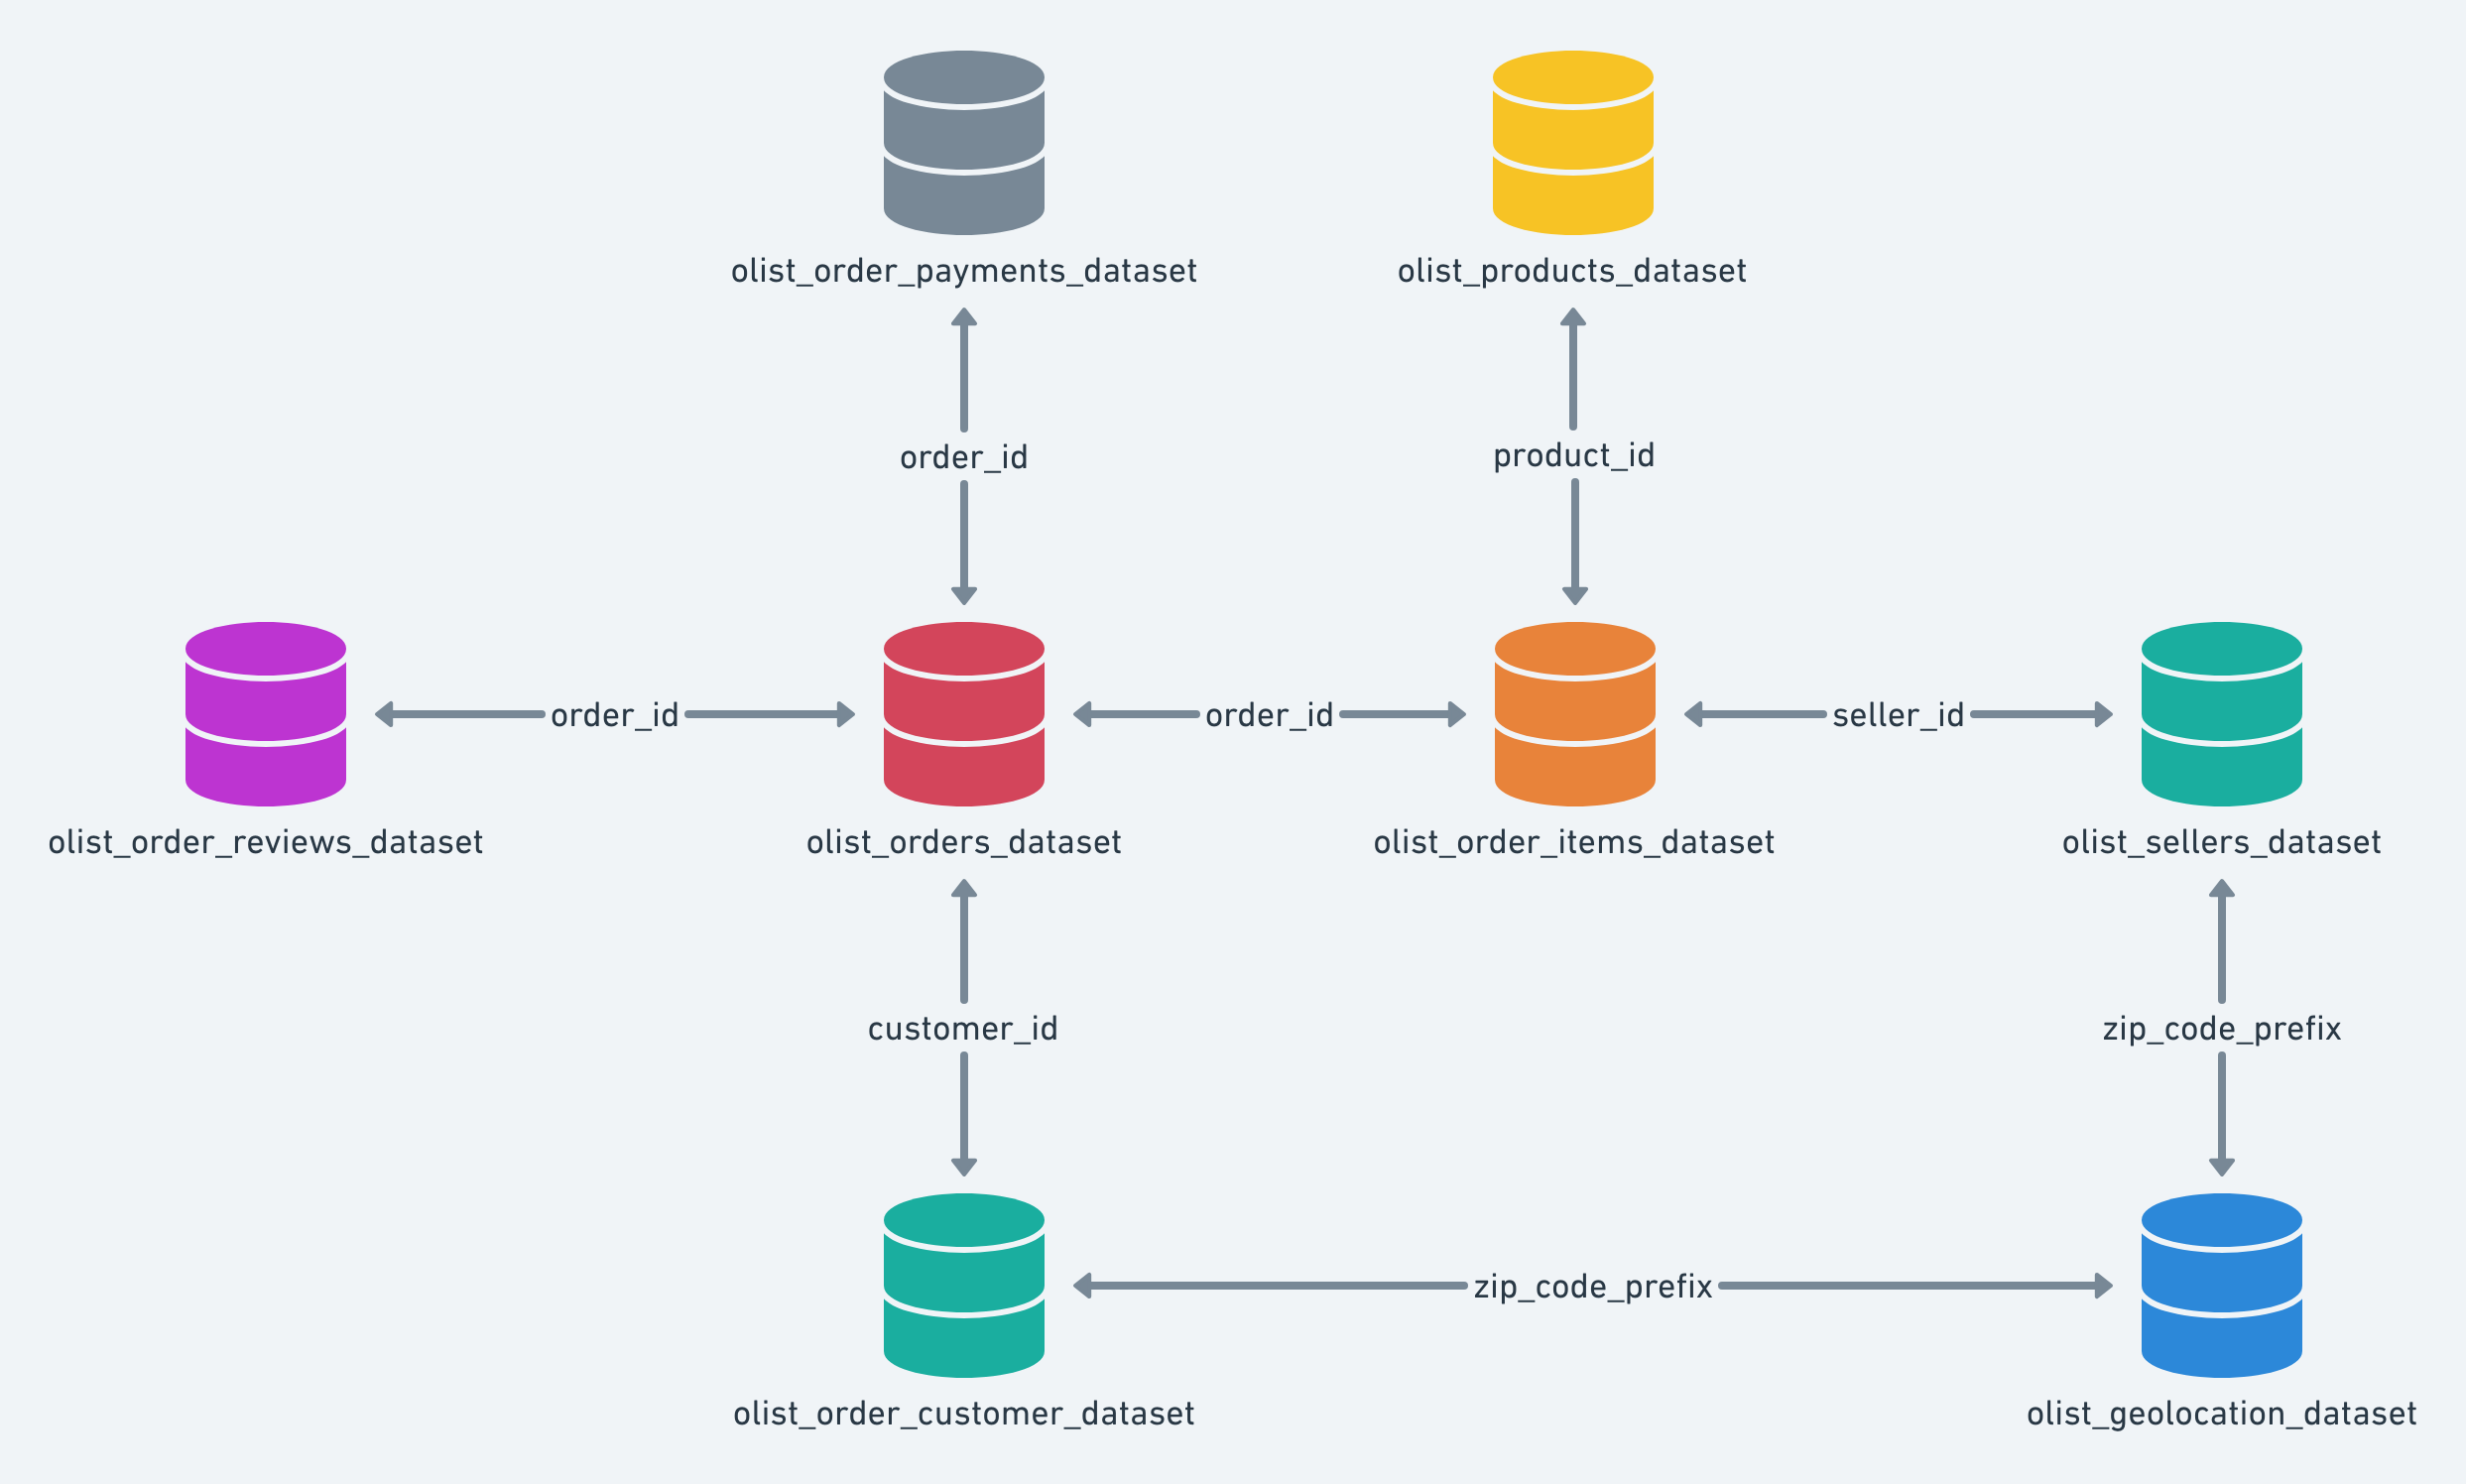

In [5]:
from IPython.display import Image
Image("Schema.png")

# 1.0 Coleta de dados

df_orders
df_order_review
df_order_items
df_customer
df_seller
df_geolocation

In [6]:
df_order_review = pd.read_csv('olist_order_reviews_dataset.csv')
df_order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
df_order_items = pd.read_csv('olist_order_items_dataset.csv')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [9]:
df_customer = pd.read_csv('olist_customers_dataset.csv')
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [10]:
df_seller = pd.read_csv('olist_sellers_dataset.csv')
df_seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
df_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


df_orders
df_order_review
df_order_items
df_customer
df_seller
df_geolocation

# 2 Preparação dos dados

## 2.1 Review pedidos (df_order_review)

* O review_id remete a um identificador único, dessa forma registros duplicatos serão eliminados.
* Um mesmo pedido só poderá ser avaliado uma única vez, dessa forma registros duplicados de order_id também serão eliminados
* será mantido a avaliação mais recente (coluna review_answer_timestamp) para ambos os casos

In [12]:
df_order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [13]:
## Organizando por datas
df_order_review.sort_values("review_answer_timestamp", inplace = True)
df_order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
37547,6916ca4502d6d3bfd39818759d55d536,bfbd0f9bdef84302105ad712db648a6c,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28
5503,49f695dffa457eaba90d388a5c37e942,e5215415bb6f76fe3b7cb68103a0d1c0,1,NaN,"PRODUTO NÃO CHEGOU,E JÁ PASSOU O PRAZO DE ENTREGA",2016-10-09 00:00:00,2016-10-11 14:31:29
60439,743d98b1a4782f0646898fc915ef002a,e2144124f98f3bf46939bc5183104041,4,NaN,NaN,2016-10-15 00:00:00,2016-10-16 03:20:17
28075,53752edb26544dd41c1209f582c9c589,b8b9d7046c083150cb5360b83a8ebb51,5,NaN,O pedido foi entregue antes do prazo pr0metido,2016-10-16 01:00:00,2016-10-16 15:45:11
41042,b2d5d8db2a841d27a72e4c06c6212368,9aa3197e4887919fde0307fc23601d7a,4,NaN,Só chegou uma parte do pedido ate agora..,2016-10-15 00:00:00,2016-10-17 21:02:49


In [14]:
df_order_review.review_id.value_counts()

2172867fd5b1a55f98fe4608e1547b4b    3
08528f70f579f0c830189efc523d2182    3
0c76e7a547a531e7bf9f0b99cba071c1    3
38821b5c496b678cf91acc34892805ad    3
f4bb9d6dd4fb6dcc2298f0e7b17b8e1e    3
                                   ..
65172425abbfdcccee4d4f399e85006d    1
a44a0bce675a84bbef98463cd5c5d41d    1
bee0d3563b9ef587e0fc1c4b07870784    1
5bf8b3332cef5fbf45f8a1f3f4f7556b    1
28e130d186bedff6b6b6a84ce7583c4b    1
Name: review_id, Length: 98410, dtype: int64

In [15]:
# dropping ALL duplicate values
df_order_review.drop_duplicates(subset ="review_id",
                     keep = 'first', inplace = True)

In [16]:
df_order_review.order_id.value_counts()

df56136b8031ecd28e200bb18e6ddb2e    3
03c939fd7fd3b38f8485a0f95798f1f6    3
e1bc1083cd7acd30d0576335373b907d    2
7f13a20e25350f4a55fb2a7c9a2e8d88    2
79ce3a0a9eba49ff442b392ab05349a4    2
                                   ..
d3cdf94c4dff1c314304625dd39a811c    1
429f1a5343ef9fc8d6b142273c6d14d2    1
3712bf9e4525972f61949a33072fcca1    1
7a36f62bdb082d4acdfb07a8e0c7f0ee    1
81958f88fdc0ca51fb2a42c8e7f416ba    1
Name: order_id, Length: 98141, dtype: int64

In [17]:
# dropping ALL duplicate values
df_order_review.drop_duplicates(subset ="order_id",
                     keep = 'first', inplace = True)

In [18]:
df_order_review.order_id.value_counts()

722551f92737b15702800d3c63dcda10    1
77e18878827762954f8e0697901368de    1
b64220d7a72e74c6736faa083586c7dd    1
51bad80ba72ab8a453ed649e57f720d8    1
c2e8b417a29b392b9f49a30a868489cf    1
                                   ..
fb5aea6237c4ec04f70112e1bcf93b99    1
add65839c01cc30f0b205ae60ac6d508    1
f1ee4afeb390f7d9b9966fddfedf3ef2    1
3e3a94885730f7e2aa4da0a98a4180e0    1
81958f88fdc0ca51fb2a42c8e7f416ba    1
Name: order_id, Length: 98141, dtype: int64

In [19]:
df_order_review

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
37547,6916ca4502d6d3bfd39818759d55d536,bfbd0f9bdef84302105ad712db648a6c,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28
5503,49f695dffa457eaba90d388a5c37e942,e5215415bb6f76fe3b7cb68103a0d1c0,1,NaN,"PRODUTO NÃO CHEGOU,E JÁ PASSOU O PRAZO DE ENTREGA",2016-10-09 00:00:00,2016-10-11 14:31:29
60439,743d98b1a4782f0646898fc915ef002a,e2144124f98f3bf46939bc5183104041,4,NaN,NaN,2016-10-15 00:00:00,2016-10-16 03:20:17
28075,53752edb26544dd41c1209f582c9c589,b8b9d7046c083150cb5360b83a8ebb51,5,NaN,O pedido foi entregue antes do prazo pr0metido,2016-10-16 01:00:00,2016-10-16 15:45:11
41042,b2d5d8db2a841d27a72e4c06c6212368,9aa3197e4887919fde0307fc23601d7a,4,NaN,Só chegou uma parte do pedido ate agora..,2016-10-15 00:00:00,2016-10-17 21:02:49
...,...,...,...,...,...,...,...
46904,6c50d16eb583d5db7e841b77e89b7045,0b223d92c27432930dfe407c6aea3041,5,NaN,NaN,2018-08-31 00:00:00,2018-10-24 16:27:36
14687,abf08328d2f1f0e8a33eee9f52f502f6,99e4a1f9377bf28f08f54a2eecccbf0d,5,NaN,NaN,2018-02-02 00:00:00,2018-10-24 18:26:25
92802,6c883909cf53725a13caf477a70f00a4,7ce4e38f4eadd993bb5b2e60bb7f7bec,5,Muito bonita,"Amei a mesinha, que pena que me confundir na c...",2018-08-16 00:00:00,2018-10-24 21:34:38
49615,728d5cfdc7283cfd0a8061d7581a19f8,7e8072dc0f35ebb0c1b2a4743e0f179a,5,NaN,NaN,2018-07-12 00:00:00,2018-10-26 21:36:41


## 2.2 Pedidos (df_orders)
* O order_id remete a um identificador único, dessa forma registros duplicatos serão eliminados.

In [20]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [21]:
df_orders.order_id.value_counts()

9c89421a3099d6b66cb2df1d2f1d3dab    1
c130858ff611f05ccbfbac337cd09cdc    1
248526cd316de31c949ea70859c1a229    1
32e3f54d03f202e02cfc79f9fd91fd06    1
5b4e981913377d776f83cb4ffd82ad31    1
                                   ..
f97038209977e4fcbbbb7ca58e55bc1b    1
bf29bb776556e9880bb6b24b8e9ec434    1
3981a5c8c4dbdfc725c00d6f464d852d    1
d5def3e0745284efef0b4dba9009f706    1
eea15eff73fcb780a208b80fff38e457    1
Name: order_id, Length: 99441, dtype: int64

Não há registros duplicados

In [22]:
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


## 2.3 Produtos dos pedidos (df_order_items)
* Um mesmo produto (product_id) pode ser registrado em vários pedidos (order_id)
* Um mesmo pedido (order_id) pode conter vários produtos (product_id)

In [23]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [24]:
df_order_items.order_id.value_counts()

8272b63d03f5f79c56e9e4120aec44ef    21
ab14fdcfbe524636d65ee38360e22ce8    20
1b15974a0141d54e36626dca3fdc731a    20
428a2f660dc84138d969ccd69a0ab6d5    15
9ef13efd6949e4573a18964dd1bbe7f5    15
                                    ..
e0ca48c3d8bef74e0cf6e6847b47f2ef     1
172d924daf19043deff749396e9eebf3     1
0e3bb5bc8f2262c9fc302e56de5b7c48     1
019edbdfeb6923e55558362c2b84ec37     1
1b1e286604c515e5961b55551d7751fe     1
Name: order_id, Length: 98666, dtype: int64

In [25]:
df_order_items[df_order_items['order_id']=='8272b63d03f5f79c56e9e4120aec44ef']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


In [26]:
df_order_items.product_id.value_counts()

aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
79380e4f154e94ac435d6d1e7ce413cd      1
4bbf316ae7ff594890e582c054a6213e      1
02f381f455650d4c7b90c96dc50a6206      1
7c2de4db4b4bbf1bf34d1051536313ae      1
d65a8b442d5ca2ebc7ccd31732257bbd      1
Name: product_id, Length: 32951, dtype: int64

In [27]:
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


## 2.4 Clientes (df_customer)
* Cada pedido se referencia á um único customer_id. Dessa forma, será checado as duplicidades.
* O customer_unique_id é o identificador do cliente, a cada compra é gerado um novo customer_ids que se referencia ao pedido

In [28]:
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [29]:
df_customer.customer_id.value_counts()

589d137c275b6d5febd35a00f490e8bc    1
d5633cabde5e5d7747c839160037af90    1
837d37e337467452b7d2c2068816177a    1
51bb6ad388ce6731e45f77e1392457d8    1
7d3460ebd7b140cb166071ca96858a90    1
                                   ..
d71a8cffeb2a8ca4ad2375b72d94c8ad    1
20a91cc566729229f1ab38edb706469a    1
a926ff5e07e6155bf31456e33c21f276    1
696bfeb907ce8c2682f82762a6ba2366    1
c40ea936fccdfb98bffbb794c89d2348    1
Name: customer_id, Length: 99441, dtype: int64

In [30]:
df_customer.customer_unique_id.value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
81727e86a8b8a9d9dcc84e67cd824a5f     1
05a4ccd655aab0d1303b42b3bf3418ef     1
a99a46d645c8dd66d91faa59ca630540     1
66e05eb40f8d647c2a68e9794fbdb010     1
f25e14da080915be2362de739fcbaae9     1
Name: customer_unique_id, Length: 96096, dtype: int64

In [31]:
df_customer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


## 2.5 Fornecedor (df_seller)
* Cada fornecedor deve ser identificado com um único seller_id

In [32]:
df_seller.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [33]:
df_seller.seller_id.value_counts()

042573af89b6d931f672efaf789d8358    1
9591fc341b1bfb7ef561e2968ec6e011    1
a4e634166243bbb3a13fa584463fa468    1
b6f52e346160519c24a23af05410ad32    1
f9903dd0f812c7e771fcad47b6fff231    1
                                   ..
747c1cdcd1737dcfbd1547f6eb6f2cf3    1
9e6967d3cf386d284251784b18ccb485    1
15aac934c58d886785ac1b17953ea898    1
d1aa1ec0839dcab73a6161130eb1f94a    1
efb628aa07c8ca93d7db0d85b91a4f5a    1
Name: seller_id, Length: 3095, dtype: int64

In [34]:
df_seller

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


## 2.6 Geolocalização (df_geolocation)
* geolocation_zip_code_prefix deve ter relação de 1 para 1 com as tabelas de fornecedores (seller_zip_code_prefix) e clientes (customer_zip_code_prefix).
* Pode haver mais de uma loja em um mesmo zip_code e a maneira como foi desenhado a relação está ambígua. (O ideal seria perguntar ao negócio como funciona essa relação mas não temos acesso ao cliente)
* Como a intenção é fazer um join em todas tabelas então os registros duplicados deverão ser eliminados.

In [35]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [36]:
df_geolocation.geolocation_zip_code_prefix.value_counts()

24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
73990       1
87307       1
72450       1
24877       1
38198       1
Name: geolocation_zip_code_prefix, Length: 19015, dtype: int64

In [37]:
df_geolocation[df_geolocation['geolocation_zip_code_prefix']==24220]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470805,24220,-22.905817,-43.106989,niteroi,RJ
470811,24220,-22.902306,-43.112545,niteroi,RJ
470812,24220,-22.904567,-43.110491,niteroi,RJ
470820,24220,-22.902575,-43.109192,niteroi,RJ
470821,24220,-22.907500,-43.106170,niteroi,RJ
...,...,...,...,...,...
474265,24220,-22.904023,-43.111683,niteroi,RJ
474266,24220,-22.905393,-43.100512,niterói,RJ
474269,24220,-22.906420,-43.104933,niteroi,RJ
474270,24220,-22.909701,-43.108452,niteroi,RJ


In [38]:
df_geolocation.drop_duplicates(subset =['geolocation_zip_code_prefix'],
                     keep = 'first', inplace = True)

In [39]:
df_geolocation.geolocation_zip_code_prefix.value_counts()

2047     1
25241    1
19100    1
17053    1
68709    1
        ..
5448     1
40265    1
3403     1
79180    1
2049     1
Name: geolocation_zip_code_prefix, Length: 19015, dtype: int64

# 3.0 Concatenando os dataframes

In [40]:
resultado = ''

In [41]:
resultado = pd.merge(left = df_order_items, right = df_orders, how = 'left', on = 'order_id')
resultado

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00


In [42]:
resultado = pd.merge(left = resultado, right = df_order_review, how = 'left', on = 'order_id')
resultado

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,9185f849f32d82e216a4e025e0c50f5c,5.0,NaN,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,be803f6a93d64719fd685c1cc610918a,5.0,NaN,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,dbdd81cd59a1a9f94a10a990b4d48dce,5.0,NaN,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,fba117c9ac40d41ca7be54741f471303,5.0,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05


In [43]:
resultado = pd.merge(left = resultado, right = df_customer, how = 'left', on = 'customer_id')
resultado

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,9185f849f32d82e216a4e025e0c50f5c,5.0,NaN,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,be803f6a93d64719fd685c1cc610918a,5.0,NaN,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,dbdd81cd59a1a9f94a10a990b4d48dce,5.0,NaN,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,fba117c9ac40d41ca7be54741f471303,5.0,NaN,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05,eb803377c9315b564bdedad672039306,13289,vinhedo,SP


In [44]:
resultado = pd.merge(left = resultado, right = df_seller, how = 'left', on = 'seller_id')
resultado

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,87900,loanda,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,NaN,2018-05-11 00:00:00,2018-05-14 12:53:47,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,88303,itajai,SC
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,NaN,2018-07-24 00:00:00,2018-07-25 09:25:29,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,1206,sao paulo,SP
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,NaN,2017-10-29 00:00:00,2017-10-29 21:33:52,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,80610,curitiba,PR
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,Recebi o produto antes do prazo e corretamente.,2017-08-17 00:00:00,2017-08-18 12:24:05,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,4733,sao paulo,SP


In [45]:
resultado.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

In [46]:
resultado = resultado.merge(df_geolocation, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix',  how = 'left')
resultado

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,campos dos goytacazes,RJ,27277,volta redonda,SP,27277.0,-22.498183,-44.123614,volta redonda,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,santa fe do sul,SP,3471,sao paulo,SP,3471.0,-23.566258,-46.518417,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,para de minas,MG,37564,borda da mata,MG,37564.0,-22.264094,-46.158564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,atibaia,SP,14403,franca,SP,14403.0,-20.548228,-47.395897,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,varzea paulista,SP,87900,loanda,PR,87900.0,-22.931427,-53.133759,loanda,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,sao luis,MA,88303,itajai,SC,88303.0,-26.912429,-48.677381,itajai,SC
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,curitiba,PR,1206,sao paulo,SP,1206.0,-23.535536,-46.643052,sao paulo,SP
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,sao paulo,SP,80610,curitiba,PR,80610.0,-25.469214,-49.293935,curitiba,PR
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,vinhedo,SP,4733,sao paulo,SP,4733.0,-23.636657,-46.694780,são paulo,SP


In [47]:
resultado = resultado.rename(columns={'geolocation_zip_code_prefix': 'geolocation_zip_code_prefix_seller',
                         'geolocation_lat': 'geolocation_lat_seller',
                         'geolocation_lng': 'geolocation_lng_seller',
                         'geolocation_city': 'geolocation_city_seller',
                         'geolocation_state': 'geolocation_state_seller'})
resultado

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,campos dos goytacazes,RJ,27277,volta redonda,SP,27277.0,-22.498183,-44.123614,volta redonda,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,santa fe do sul,SP,3471,sao paulo,SP,3471.0,-23.566258,-46.518417,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,para de minas,MG,37564,borda da mata,MG,37564.0,-22.264094,-46.158564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,atibaia,SP,14403,franca,SP,14403.0,-20.548228,-47.395897,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,varzea paulista,SP,87900,loanda,PR,87900.0,-22.931427,-53.133759,loanda,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,sao luis,MA,88303,itajai,SC,88303.0,-26.912429,-48.677381,itajai,SC
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,curitiba,PR,1206,sao paulo,SP,1206.0,-23.535536,-46.643052,sao paulo,SP
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,sao paulo,SP,80610,curitiba,PR,80610.0,-25.469214,-49.293935,curitiba,PR
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,vinhedo,SP,4733,sao paulo,SP,4733.0,-23.636657,-46.694780,são paulo,SP


In [48]:
resultado = resultado.merge(df_geolocation, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix',  how = 'left')
resultado

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,27277.0,-22.498183,-44.123614,volta redonda,RJ,28013.0,-21.758076,-41.312633,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,3471.0,-23.566258,-46.518417,sao paulo,SP,15775.0,-20.212393,-50.941471,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,37564.0,-22.264094,-46.158564,borda da mata,MG,35661.0,-19.860439,-44.597972,pará de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,14403.0,-20.548228,-47.395897,franca,SP,12952.0,-23.144923,-46.539830,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,87900.0,-22.931427,-53.133759,loanda,PR,13226.0,-23.249008,-46.824961,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,88303.0,-26.912429,-48.677381,itajai,SC,65077.0,-2.490420,-44.303287,sao luis,MA
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,1206.0,-23.535536,-46.643052,sao paulo,SP,81690.0,-25.601485,-49.317700,curitiba,PR
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,80610.0,-25.469214,-49.293935,curitiba,PR,4039.0,-23.597813,-46.650272,sao paulo,SP
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,4733.0,-23.636657,-46.694780,são paulo,SP,13289.0,-23.036935,-46.982526,vinhedo,SP


In [49]:
resultado = resultado.rename(columns={'geolocation_zip_code_prefix': 'geolocation_zip_code_prefix_customer',
                         'geolocation_lat': 'geolocation_lat_customer',
                         'geolocation_lng': 'geolocation_lng_customer',
                         'geolocation_city': 'geolocation_city_customer',
                         'geolocation_state': 'geolocation_state_customer'})
resultado

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,27277.0,-22.498183,-44.123614,volta redonda,RJ,28013.0,-21.758076,-41.312633,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,3471.0,-23.566258,-46.518417,sao paulo,SP,15775.0,-20.212393,-50.941471,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,37564.0,-22.264094,-46.158564,borda da mata,MG,35661.0,-19.860439,-44.597972,pará de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,14403.0,-20.548228,-47.395897,franca,SP,12952.0,-23.144923,-46.539830,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,87900.0,-22.931427,-53.133759,loanda,PR,13226.0,-23.249008,-46.824961,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,88303.0,-26.912429,-48.677381,itajai,SC,65077.0,-2.490420,-44.303287,sao luis,MA
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,1206.0,-23.535536,-46.643052,sao paulo,SP,81690.0,-25.601485,-49.317700,curitiba,PR
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,80610.0,-25.469214,-49.293935,curitiba,PR,4039.0,-23.597813,-46.650272,sao paulo,SP
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,4733.0,-23.636657,-46.694780,são paulo,SP,13289.0,-23.036935,-46.982526,vinhedo,SP


In [50]:
resultado.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_zip_code_prefix_seller', 'geolocation_lat_seller',
       'geolocation_lng_seller', 'geolocation_city_seller',
       'geolocation_state_seller', 'geolocation_zip_code_prefix_customer',
       'geolocation_lat_customer', 'geolocation_lng_customer',
       'geolocation_city_customer', 'geolocation_state_customer'],
      dtype='object')

# 4.0 Pré-Processamento

### Estatisticas descritivas
NÃO há nenhuma inconsistencias nos dados como, por exemplo:
- Valores negativos de frete, quantidade comprada e preços
- Outliers quantidade comprada, preços, valor de frete, score do pedido, dia, mes e ano da compra.


In [51]:
resultado.describe()

,order_item_id,price,freight_value,review_score,customer_zip_code_prefix,seller_zip_code_prefix,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer
count,112650.000000,112650.000000,112650.000000,111125.000000,112650.000000,112650.000000,112397.000000,112397.000000,112397.000000,112348.000000,112348.000000,112348.000000
mean,1.197834,120.653739,19.990320,4.034781,35119.309090,24439.170431,24435.840191,-22.800558,-47.235919,35042.482652,-21.235315,-46.202639
std,0.705124,183.633928,15.806405,1.386123,29866.120801,27596.030909,27593.085486,2.697063,2.341211,29853.323545,5.580937,4.046648
min,1.000000,0.850000,0.000000,1.000000,1003.000000,1001.000000,1001.000000,-36.605374,-67.809656,1003.000000,-36.605374,-72.666706
25%,1.000000,39.900000,13.080000,4.000000,11310.000000,6429.000000,6429.000000,-23.610305,-48.831547,11250.000000,-23.590818,-48.111461
50%,1.000000,74.990000,16.260000,5.000000,24340.000000,13568.000000,13568.000000,-23.422313,-46.747050,24240.000000,-22.930927,-46.633346
75%,1.000000,134.900000,21.150000,5.000000,59028.750000,27930.000000,27345.000000,-21.766477,-46.518082,58430.250000,-20.189088,-43.642049
max,21.000000,6735.000000,409.680000,5.000000,99990.000000,99730.000000,99730.000000,-2.546079,-34.847856,99990.000000,42.184003,-8.577855


### Checagem valores nulos

In [52]:
len(resultado)

112650

In [53]:
resultado.isnull().sum()

order_id                                    0
order_item_id                               0
product_id                                  0
seller_id                                   0
shipping_limit_date                         0
price                                       0
freight_value                               0
customer_id                                 0
order_status                                0
order_purchase_timestamp                    0
order_approved_at                          15
order_delivered_carrier_date             1194
order_delivered_customer_date            2454
order_estimated_delivery_date               0
review_id                                1525
review_score                             1525
review_comment_title                    99266
review_comment_message                  65471
review_creation_date                     1525
review_answer_timestamp                  1525
customer_unique_id                          0
customer_zip_code_prefix          

Há valores nulos, nas colunas de score dos pedidos, as datas de entrega e os zipcodes dos clientes e fornecedores. Linhas que contenham valores nulos para essa colunas serão removidas:

In [54]:
#resultado = resultado.dropna(subset=['review_score', 'order_delivered_customer_date','geolocation_zip_code_prefix_seller','geolocation_zip_code_prefix_customer'])

In [55]:
#len(resultado)

In [56]:
#resultado.isnull().sum()

Após a remoção das linhas em branco, ainda há registros de valores nulos nas colunas de comentários do review, titulo do review e data de postagem do pedido. 
Não há nenhum problema em mantê-las em branco no dataset uma vez que essas colunas não serão utilizadas no projeto.

### Relatório

In [57]:
import pandas_profiling

In [57]:
#pandas_profiling.ProfileReport(resultado)

# 5.0 Clusterização de clientes

## 5.1 Novas features

In [58]:
resultado['TotalValue'] = resultado['price']+resultado['freight_value']

In [59]:
resultado

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer,TotalValue
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,-22.498183,-44.123614,volta redonda,RJ,28013.0,-21.758076,-41.312633,campos dos goytacazes,RJ,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,-23.566258,-46.518417,sao paulo,SP,15775.0,-20.212393,-50.941471,santa fe do sul,SP,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,-22.264094,-46.158564,borda da mata,MG,35661.0,-19.860439,-44.597972,pará de minas,MG,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,-20.548228,-47.395897,franca,SP,12952.0,-23.144923,-46.539830,atibaia,SP,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,-22.931427,-53.133759,loanda,PR,13226.0,-23.249008,-46.824961,varzea paulista,SP,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,-26.912429,-48.677381,itajai,SC,65077.0,-2.490420,-44.303287,sao luis,MA,343.40
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,-23.535536,-46.643052,sao paulo,SP,81690.0,-25.601485,-49.317700,curitiba,PR,386.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,-25.469214,-49.293935,curitiba,PR,4039.0,-23.597813,-46.650272,sao paulo,SP,116.85
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,-23.636657,-46.694780,são paulo,SP,13289.0,-23.036935,-46.982526,vinhedo,SP,64.71


In [60]:
resultado['order_purchase_timestamp'] = pd.to_datetime(resultado['order_purchase_timestamp'])

In [61]:
resultado['Year'] = resultado['order_purchase_timestamp'].dt.year

In [62]:
resultado['Month'] = resultado['order_purchase_timestamp'].dt.month 

In [63]:
resultado['Semester'] = resultado['Month'].apply(lambda x: 1 if x <= 6 else 2)

In [64]:
resultado.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,geolocation_state_seller,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer,TotalValue,Year,Month,Semester
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,RJ,28013.0,-21.758076,-41.312633,campos dos goytacazes,RJ,72.19,2017,9,2
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,SP,15775.0,-20.212393,-50.941471,santa fe do sul,SP,259.83,2017,4,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,MG,35661.0,-19.860439,-44.597972,pará de minas,MG,216.87,2018,1,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,SP,12952.0,-23.144923,-46.539830,atibaia,SP,25.78,2018,8,2
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,PR,13226.0,-23.249008,-46.824961,varzea paulista,SP,218.04,2017,2,1


In [65]:
resultado.describe()

,order_item_id,price,freight_value,review_score,customer_zip_code_prefix,seller_zip_code_prefix,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,TotalValue,Year,Month,Semester
count,112650.000000,112650.000000,112650.000000,111125.000000,112650.000000,112650.000000,112397.000000,112397.000000,112397.000000,112348.000000,112348.000000,112348.000000,112650.000000,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320,4.034781,35119.309090,24439.170431,24435.840191,-22.800558,-47.235919,35042.482652,-21.235315,-46.202639,140.644059,2017.541909,6.026835,1.437337
std,0.705124,183.633928,15.806405,1.386123,29866.120801,27596.030909,27593.085486,2.697063,2.341211,29853.323545,5.580937,4.046648,190.724394,0.504792,3.232541,0.496060
min,1.000000,0.850000,0.000000,1.000000,1003.000000,1001.000000,1001.000000,-36.605374,-67.809656,1003.000000,-36.605374,-72.666706,6.080000,2016.000000,1.000000,1.000000
25%,1.000000,39.900000,13.080000,4.000000,11310.000000,6429.000000,6429.000000,-23.610305,-48.831547,11250.000000,-23.590818,-48.111461,55.220000,2017.000000,3.000000,1.000000
50%,1.000000,74.990000,16.260000,5.000000,24340.000000,13568.000000,13568.000000,-23.422313,-46.747050,24240.000000,-22.930927,-46.633346,92.320000,2018.000000,6.000000,1.000000
75%,1.000000,134.900000,21.150000,5.000000,59028.750000,27930.000000,27345.000000,-21.766477,-46.518082,58430.250000,-20.189088,-43.642049,157.937500,2018.000000,8.000000,2.000000
max,21.000000,6735.000000,409.680000,5.000000,99990.000000,99730.000000,99730.000000,-2.546079,-34.847856,99990.000000,42.184003,-8.577855,6929.310000,2018.000000,12.000000,2.000000


### Features para realizar RFM : Recency, Frequency, Monetary Analysis

## 5.2 Recency and Monetary

In [66]:
resultado.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_zip_code_prefix_seller', 'geolocation_lat_seller',
       'geolocation_lng_seller', 'geolocation_city_seller',
       'geolocation_state_seller', 'geolocation_zip_code_prefix_customer',
       'geolocation_lat_customer', 'geolocation_lng_customer',
       'geolocation_city_customer', 'geolocation_state_customer', 'TotalValue',
       'Year', 'Month', 'Semester

In [67]:
resultado['order_purchase_timestamp2'] = pd.to_datetime(resultado['order_purchase_timestamp'])
resultado

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer,TotalValue,Year,Month,Semester,order_purchase_timestamp2
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,28013.0,-21.758076,-41.312633,campos dos goytacazes,RJ,72.19,2017,9,2,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,15775.0,-20.212393,-50.941471,santa fe do sul,SP,259.83,2017,4,1,2017-04-26 10:53:06
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,35661.0,-19.860439,-44.597972,pará de minas,MG,216.87,2018,1,1,2018-01-14 14:33:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,12952.0,-23.144923,-46.539830,atibaia,SP,25.78,2018,8,2,2018-08-08 10:00:35
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,13226.0,-23.249008,-46.824961,varzea paulista,SP,218.04,2017,2,1,2017-02-04 13:57:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,65077.0,-2.490420,-44.303287,sao luis,MA,343.40,2018,4,1,2018-04-23 13:57:06
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,81690.0,-25.601485,-49.317700,curitiba,PR,386.53,2018,7,2,2018-07-14 10:26:46
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,4039.0,-23.597813,-46.650272,sao paulo,SP,116.85,2017,10,2,2017-10-23 17:07:56
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,13289.0,-23.036935,-46.982526,vinhedo,SP,64.71,2017,8,2,2017-08-14 23:02:59


In [68]:
df = resultado.groupby('customer_unique_id').agg({'TotalValue':np.sum, 'order_purchase_timestamp':min, 'order_purchase_timestamp2':max, 'order_id':'nunique'}).sort_values(by='TotalValue', ascending=False)
df

,TotalValue,order_purchase_timestamp,order_purchase_timestamp2,order_id
customer_unique_id,,,,
0a0a92112bd4c708ca5fde585afaa872,13664.08,2017-09-29 15:24:52,2017-09-29 15:24:52,1
da122df9eeddfedc1dc1f5349a1a690c,7571.63,2017-04-01 15:58:40,2017-04-01 15:58:41,2
763c8b1c9c68a0229c42c9fc6f662b93,7274.88,2018-07-15 14:49:44,2018-07-15 14:49:44,1
dc4802a71eae9be1dd28f5d788ceb526,6929.31,2017-02-12 20:37:36,2017-02-12 20:37:36,1
459bef486812aa25204be022145caa62,6922.21,2018-07-25 18:10:17,2018-07-25 18:10:17,1
...,...,...,...,...
2878e5b88167faab17d4fb83a986d38b,11.63,2017-10-29 20:28:51,2017-10-29 20:28:51,1
6f5b9d1cdccc4d28f0483a612edecacf,11.63,2017-09-02 16:05:34,2017-09-02 16:05:34,1
b33336f46234b24a613ad9064d13106d,10.89,2018-06-21 20:29:25,2018-06-21 20:29:25,1


In [69]:
df['Diff'] = df['order_purchase_timestamp2']-df['order_purchase_timestamp']
df

,TotalValue,order_purchase_timestamp,order_purchase_timestamp2,order_id,Diff
customer_unique_id,,,,,
0a0a92112bd4c708ca5fde585afaa872,13664.08,2017-09-29 15:24:52,2017-09-29 15:24:52,1,00:00:00
da122df9eeddfedc1dc1f5349a1a690c,7571.63,2017-04-01 15:58:40,2017-04-01 15:58:41,2,00:00:01
763c8b1c9c68a0229c42c9fc6f662b93,7274.88,2018-07-15 14:49:44,2018-07-15 14:49:44,1,00:00:00
dc4802a71eae9be1dd28f5d788ceb526,6929.31,2017-02-12 20:37:36,2017-02-12 20:37:36,1,00:00:00
459bef486812aa25204be022145caa62,6922.21,2018-07-25 18:10:17,2018-07-25 18:10:17,1,00:00:00
...,...,...,...,...,...
2878e5b88167faab17d4fb83a986d38b,11.63,2017-10-29 20:28:51,2017-10-29 20:28:51,1,00:00:00
6f5b9d1cdccc4d28f0483a612edecacf,11.63,2017-09-02 16:05:34,2017-09-02 16:05:34,1,00:00:00
b33336f46234b24a613ad9064d13106d,10.89,2018-06-21 20:29:25,2018-06-21 20:29:25,1,00:00:00


In [70]:
df['Diff'] = df['Diff'].dt.days
df.sort_values(by ='Diff')

,TotalValue,order_purchase_timestamp,order_purchase_timestamp2,order_id,Diff
customer_unique_id,,,,,
0a0a92112bd4c708ca5fde585afaa872,13664.08,2017-09-29 15:24:52,2017-09-29 15:24:52,1,0
4d95d7be8e0e30b234f1e64ba6472732,75.25,2018-03-27 01:27:37,2018-03-27 01:27:37,1,0
422e3a837e4b97707cac86272dc8baa9,75.25,2018-04-03 10:41:06,2018-04-03 10:41:06,1,0
5477633464629dfe2250f058ced9efa8,75.25,2018-03-21 15:35:07,2018-03-21 15:35:07,1,0
f190bd9c1d71792c70d05451bbce9335,75.25,2018-03-19 11:54:23,2018-03-19 11:54:23,1,0
...,...,...,...,...,...
87b3f231705783eb2217e25851c0a45d,523.12,2016-10-08 18:45:34,2018-05-04 11:14:37,2,572
94e5ea5a8c1bf546db2739673060c43f,187.17,2016-10-05 21:10:56,2018-05-09 13:49:19,2,580
d8f3c4f441a9b59a29f977df16724f38,158.51,2017-01-18 21:08:18,2018-08-24 17:52:59,2,582


In [71]:
## Tratando os dados quando usuários realizaram apenas 1 compra (setar como 1 dia)
df['Diff'] = df['Diff'].apply(lambda x: x if x > 1 else 1)

#Visualizando os registros com usuários que realizaram mais de uma compra em mais de 1 dia:
df[df['Diff']>1]

,TotalValue,order_purchase_timestamp,order_purchase_timestamp2,order_id,Diff
customer_unique_id,,,,,
055ec572ac7f3c7bdd04a183830ebe59,4053.08,2017-06-18 17:22:09,2017-07-18 18:49:15,2,30
59d66d72939bc9497e19d89c61a96d5f,3559.99,2017-03-02 12:13:18,2017-08-10 22:09:50,2,161
eae0a83d752b1dd32697e0e7b4221656,2783.01,2018-02-01 18:32:02,2018-04-24 17:06:54,2,81
86df00dc5fd68f4dd5d5945ca19f3ed6,2400.48,2017-06-08 10:49:42,2017-10-13 16:10:18,3,127
1da09dd64e235e7c2f29a4faff33535c,2164.40,2017-05-10 14:04:15,2018-01-11 11:16:49,3,245
...,...,...,...,...,...
4c3d123168c78dcca6cde5a7274430a5,40.56,2017-05-14 12:30:01,2017-06-12 08:57:04,2,28
dd7b0e9b51e5377bd9c1fd3e286c7b9d,40.18,2018-01-16 11:51:45,2018-02-26 12:42:32,2,41
f7b981e8a280e455ac3cbe0d5d171bd1,39.24,2016-12-23 23:16:47,2017-01-05 11:56:06,2,12


# CLV ou LTV por cliente

CLV = LTV = (Receita / Numero de compras) * (Numero de transações / Periodo) * Periodo de retenção

Não possuimos o tempo de retenção de um cliente, dessa forma, vamos aproximá-lo como a média entre a primeira e ultima transação de toda a base de clientes. O ideal seria realizar um levantamento dessa métrica avaliando o periodo que um cliente fica ativo antes de dar Churn.

In [ ]:
## Renomeando as colunas e selecionando as variáveis para clusterização
df = df.rename(columns={'Diff': 'Recency',
                         'TotalValue': 'Monetary',
                         'order_id': 'Frequency'})
#df_rfm = df.reset_index()
#df_rfm = df_rfm[['customer_unique_id','Recency','Frequency','Monetary']]

In [86]:
df.Recency.value_counts()

1      93398
2         30
6         30
3         26
7         24
       ...  
537        1
345        1
472        1
408        1
157        1
Name: Recency, Length: 419, dtype: int64

In [96]:
tempo_retencao_cliente = np.mean(df['order_purchase_timestamp2'] - df['order_purchase_timestamp'])/np.timedelta64(1,'D')
tempo_retencao_cliente

2.6835067950076503

A média para todo dataset é que cada cliente fique ativo na Olist por apenas 2.683 dias, a média é puxada para baixo devido ao alto número de pessoas (93.368 clientes) que compraram apenas 1x na OLIST.

No entanto, desconsiderar esses clientes no calculo acarretaria em superestimação do tempo de retenção. O ideal seria realizar um levantamento dessa métrica avaliando o periodo que um cliente fica ativo antes de dar Churn.

Como não temos esses dados, utilizaremos a media subestimada com todos os clientes.

In [97]:
df['CLV'] = ( df['Monetary'] / df['Frequency'] ) * ( df['Frequency'] / df['Recency'] ) * tempo_retencao_cliente

In [98]:
df.head()

,Monetary,order_purchase_timestamp,order_purchase_timestamp2,Frequency,Recency,CLV
customer_unique_id,,,,,,
0a0a92112bd4c708ca5fde585afaa872,13664.08,2017-09-29 15:24:52,2017-09-29 15:24:52,1,1,36667.651528
da122df9eeddfedc1dc1f5349a1a690c,7571.63,2017-04-01 15:58:40,2017-04-01 15:58:41,2,1,20318.520554
763c8b1c9c68a0229c42c9fc6f662b93,7274.88,2018-07-15 14:49:44,2018-07-15 14:49:44,1,1,19522.189913
dc4802a71eae9be1dd28f5d788ceb526,6929.31,2017-02-12 20:37:36,2017-02-12 20:37:36,1,1,18594.850470
459bef486812aa25204be022145caa62,6922.21,2018-07-25 18:10:17,2018-07-25 18:10:17,1,1,18575.797571


Como o valor de tempo de retenção pode não corresponder o valor real essa é uma métrica com alta variancia para os clientes. Deve ser usada apenas como variável consultiva e não determinante na clusterização.

In [99]:
df.describe()

,Monetary,Frequency,Recency,CLV
count,95420.000000,95420.000000,95420.000000,95420.000000
mean,166.040172,1.034018,3.650692,428.127085
std,228.320333,0.211234,25.108181,601.979535
min,9.590000,1.000000,1.000000,0.392500
25%,63.100000,1.000000,1.000000,161.010408
50%,107.940000,1.000000,1.000000,279.809254
75%,183.220000,1.000000,1.000000,473.108957
max,13664.080000,16.000000,633.000000,36667.651528


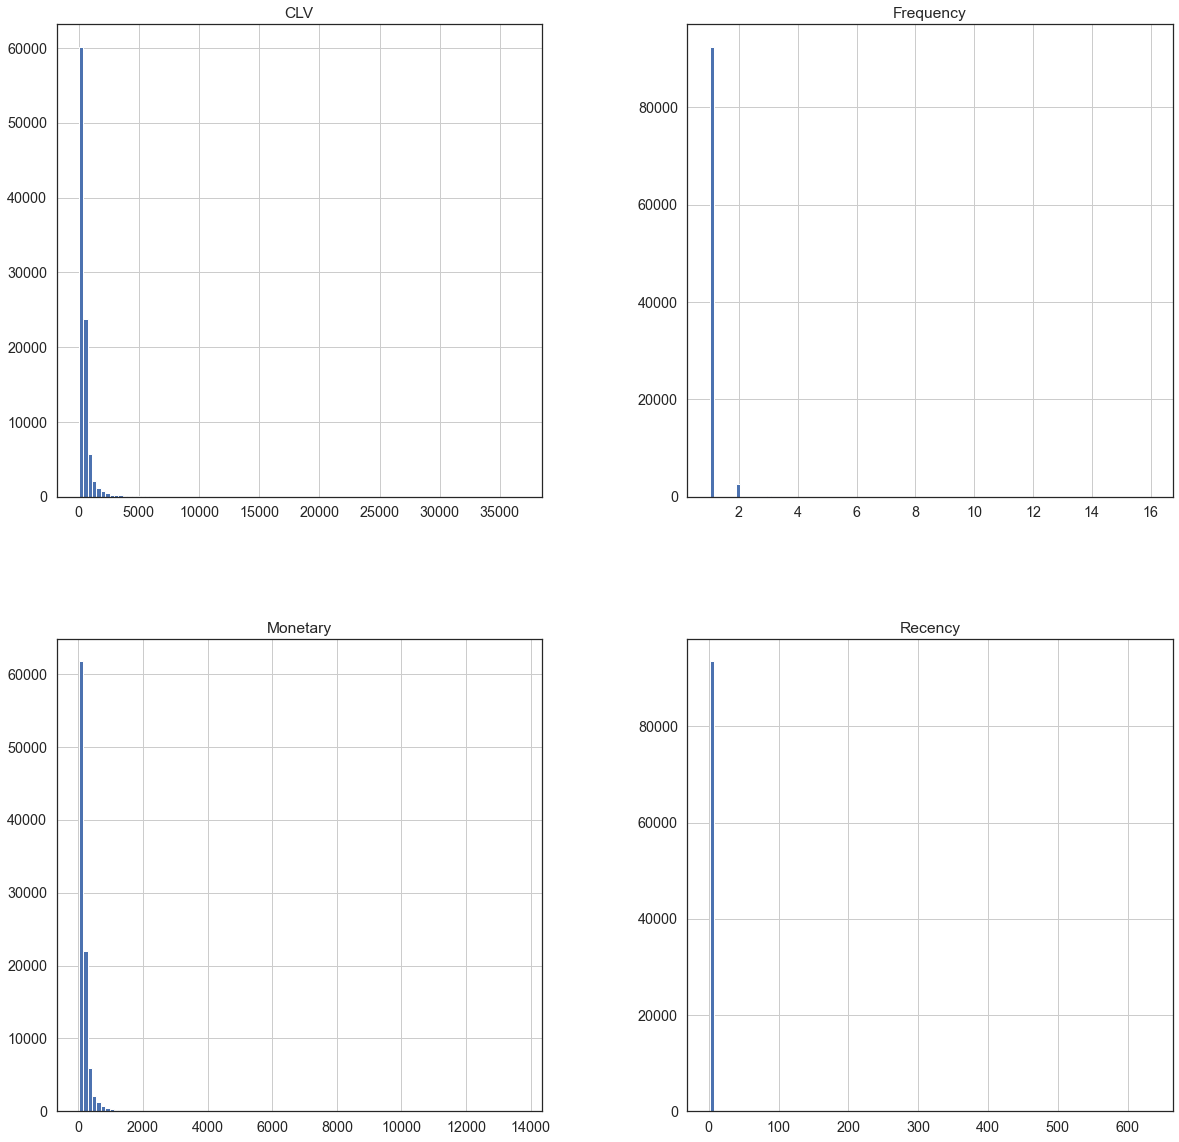

In [102]:
%matplotlib inline
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=df.hist(bins=100)

Media CLV clientes = 428.127 

### Dataset Clusterizado

In [73]:
df_rfm = df[['Recency','Frequency','Monetary']]
df_rfm

,Recency,Frequency,Monetary
customer_unique_id,,,
0a0a92112bd4c708ca5fde585afaa872,1,1,13664.08
da122df9eeddfedc1dc1f5349a1a690c,1,2,7571.63
763c8b1c9c68a0229c42c9fc6f662b93,1,1,7274.88
dc4802a71eae9be1dd28f5d788ceb526,1,1,6929.31
459bef486812aa25204be022145caa62,1,1,6922.21
...,...,...,...
2878e5b88167faab17d4fb83a986d38b,1,1,11.63
6f5b9d1cdccc4d28f0483a612edecacf,1,1,11.63
b33336f46234b24a613ad9064d13106d,1,1,10.89


## 5.3 Normalização

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()

In [76]:
rfm_normalizado = scaler.fit_transform(df_rfm)
df_rfm_normalizado = pd.DataFrame(rfm_normalizado)


df_rfm_normalizado = df_rfm_normalizado.rename(columns={0: 'Recency',
                         2: 'Monetary',
                         1: 'Frequency'})
df_rfm_normalizado

,Recency,Frequency,Monetary
0,-0.105571,-0.161045,59.119179
1,-0.105571,4.573066,32.435257
2,-0.105571,-0.161045,31.135541
3,-0.105571,-0.161045,29.622002
4,-0.105571,-0.161045,29.590905
...,...,...,...
95415,-0.105571,-0.161045,-0.676291
95416,-0.105571,-0.161045,-0.676291
95417,-0.105571,-0.161045,-0.679532
95418,-0.105571,-0.161045,-0.683124


### Visualização clusters (PCA = 2)

In [77]:
from sklearn.decomposition import PCA

In [78]:
pca_2 = PCA(2)
pca_2_result = pca_2.fit_transform(df_rfm_normalizado)

print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Cumulative variance explained by 2 principal components: 86.82%


# 5.4 Kmeans

Para determinar o numero de cluster, avaliaremos o método de Elbow.

In [79]:
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_score

In [80]:
inertia = []
silhouette = {}

for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=400, random_state=0)
    kmeans.fit(df_rfm_normalizado)
    inertia.append(kmeans.inertia_)
    #silhouette[i] = silhouette_score(df_rfm_normalizado, kmeans.labels_, metric='euclidean')

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:13<00:00,  1.73s/it]


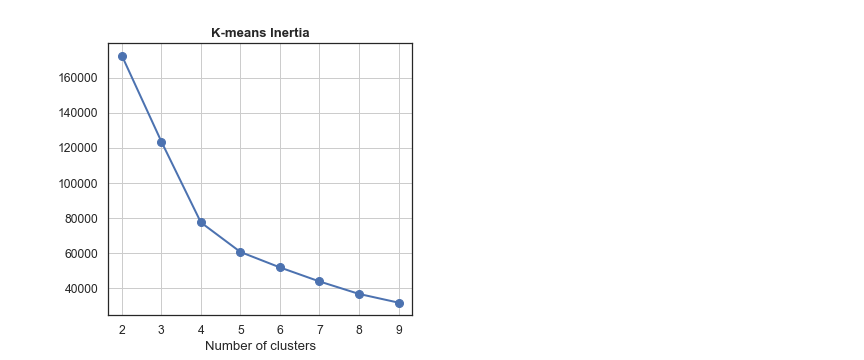

In [81]:
sns.set(style='white',font_scale=1.1, rc={'figure.figsize':(12,5)})

plt.subplot(1, 2, 1)

plt.plot(range(2,len(inertia)+2), inertia, marker='o',lw=2,ms=8)
plt.xlabel('Number of clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

#plt.subplot(1, 2, 2)

#plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',width=0.5)
#plt.xticks(range(len(silhouette)), list(silhouette.keys()))
#plt.grid()
#plt.title('Silhouette Score',fontweight='bold')
#plt.xlabel('Number of Clusters')


plt.savefig("graph1.png")
Image("graph1.png")

Definindo a quantidade ótima de clusters: 
    - Algorítmo:
    
    * Traçar reta entre os extremos da curva de Inertia pontos ( 2, inertia(2) ) e  (9, inertia(9) )
    * Retornando o numero de clusters cujo ponto se encontra mais distante da reta

In [82]:
x1, x2 = 2, 9
intervalo = range(x1,x2+1)

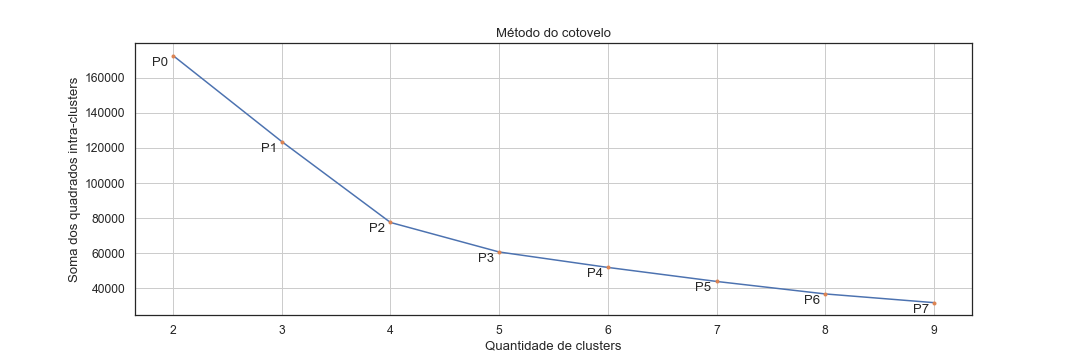

In [83]:
plt.figure(figsize=(15,5))
plt.title('Método do cotovelo')
plt.xlabel('Quantidade de clusters')
plt.ylabel('Soma dos quadrados intra-clusters')
plt.grid()
plt.xticks(intervalo)
plt.plot(intervalo, inertia) # pontos laranjas
plt.plot(intervalo, inertia, '.') # linha azul
for x,y in zip(intervalo,inertia): # colocando nome nos pontos
    label = "P{}".format(x-2)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(-5,-10),
                 ha='right')
    
plt.savefig("graph2.png")
Image("graph2.png")

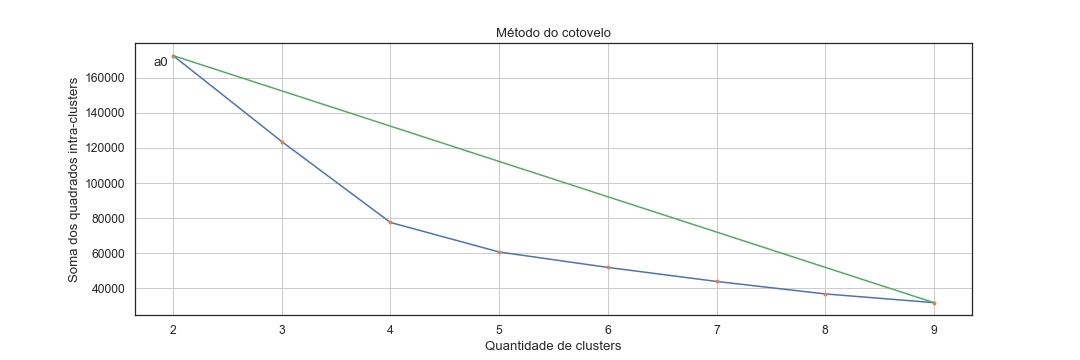

In [84]:
plt.figure(figsize=(15,5))
plt.title('Método do cotovelo')
plt.xlabel('Quantidade de clusters')
plt.ylabel('Soma dos quadrados intra-clusters')
plt.grid()
plt.xticks(intervalo)
plt.plot(intervalo, inertia) # pontos laranjas
plt.plot(intervalo, inertia, '.') # linha azul

y2 = inertia[len(inertia)-1]
y1 = inertia[0]

plt.plot([x2, x1], [y2,y1]) # linha verde

for x,y in zip(intervalo,inertia): # colocando nome nos pontos
    if x < 3 or x > 19:
        label = "a{}".format(x-2)
        plt.annotate(label,
                     (x,y),
                     textcoords="offset points",
                     xytext=(-5,-10),
                     ha='right')
plt.savefig("graph3.png")
Image("graph3.png")

In [85]:
## Implementando uma função que traça a distancia do ponto á reta e que retorna o numero de cluster cujo a distância é maximizada.

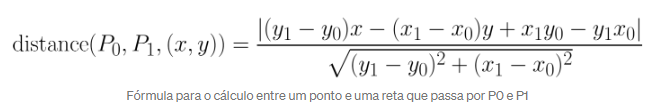

In [86]:
Image("Distancia.png")

In [87]:
def optimal_number_of_clusters(inertia):
    """
    Calcula a maior distância entre os pontos que marcam as 
    somas dos quadrados intra-clusters para os clusters 2 à 9 calculadas 
    com a inertia
    
    Parametros
    ----------
    Inertia : lista
        lista contendo os valores de soma de quadrados intra-cluster (inertia)
    
    Returns
    -------
    int : número de clusters 
    """
    from math import sqrt
    x1, y1 = 2, inertia[0]
    x2, y2 = 10, inertia[len(inertia)-1]

    distances = []
    for i in range(len(inertia)):
        x0 = i+2
        y0 = inertia[i]

        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    return distances.index(max(distances)) + 2

In [88]:
n = optimal_number_of_clusters(inertia)

In [89]:
n

4

### 5.1 Visualização dos 4 clusters

In [90]:
kmeans = cluster.KMeans(n_clusters=4,init='k-means++', random_state=0)
kmeans_labels = kmeans.fit_predict(df_rfm_normalizado)

## Captando os 4 centroides e reduzindo a dimensionalidade para plotar em gráficos
kmeans_centroids = kmeans.cluster_centers_
kmeans_centroids_pca = pca_2.transform(kmeans_centroids)

pd.Series(kmeans_labels).value_counts()

C:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


0    89363
3     3172
1     2206
2      679
dtype: int64

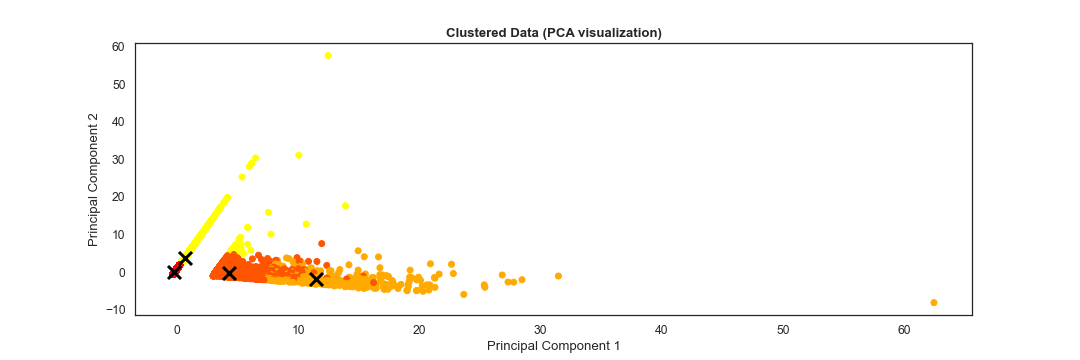

In [91]:
plt.figure(figsize=(15,5))
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], c=kmeans_labels, cmap='autumn')
plt.scatter(kmeans_centroids_pca[:, 0], kmeans_centroids_pca[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10,lw=3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA visualization)',fontweight='bold')
plt.savefig("graph4.png")
Image("graph4.png")

### 5.2 Adicionando os clusters nos datasets

In [92]:
df_rfm['Cluster'] = kmeans_labels
df_rfm

<ipython-input-92-91677ab2c610>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['Cluster'] = kmeans_labels


,Recency,Frequency,Monetary,Cluster
customer_unique_id,,,,
0a0a92112bd4c708ca5fde585afaa872,1,1,13664.08,3
da122df9eeddfedc1dc1f5349a1a690c,1,2,7571.63,3
763c8b1c9c68a0229c42c9fc6f662b93,1,1,7274.88,3
dc4802a71eae9be1dd28f5d788ceb526,1,1,6929.31,3
459bef486812aa25204be022145caa62,1,1,6922.21,3
...,...,...,...,...
2878e5b88167faab17d4fb83a986d38b,1,1,11.63,0
6f5b9d1cdccc4d28f0483a612edecacf,1,1,11.63,0
b33336f46234b24a613ad9064d13106d,1,1,10.89,0


In [93]:
df_rfm_normalizado['Cluster'] = kmeans_labels
df_rfm_normalizado

,Recency,Frequency,Monetary,Cluster
0,-0.105571,-0.161045,59.119179,3
1,-0.105571,4.573066,32.435257,3
2,-0.105571,-0.161045,31.135541,3
3,-0.105571,-0.161045,29.622002,3
4,-0.105571,-0.161045,29.590905,3
...,...,...,...,...
95415,-0.105571,-0.161045,-0.676291,0
95416,-0.105571,-0.161045,-0.676291,0
95417,-0.105571,-0.161045,-0.679532,0
95418,-0.105571,-0.161045,-0.683124,0


## 5.3 Características e Estatisticas descritivas dos clusters

In [94]:
df_rfm[df_rfm['Cluster']==0].describe()

,Recency,Frequency,Monetary,Cluster
count,89363.0,89363.0,89363.000000,89363.0
mean,1.0,1.0,130.577563,0.0
std,0.0,0.0,99.220603,0.0
min,1.0,1.0,9.590000,0.0
25%,1.0,1.0,60.850000,0.0
50%,1.0,1.0,102.030000,0.0
75%,1.0,1.0,167.290000,0.0
max,1.0,1.0,590.630000,0.0


In [95]:
df_rfm[df_rfm['Cluster']==1].describe()

,Recency,Frequency,Monetary,Cluster
count,2206.000000,2206.000000,2206.000000,2206.0
mean,33.097915,2.064370,280.054334,1.0
std,41.941958,0.283211,214.788104,0.0
min,1.000000,2.000000,34.970000,1.0
25%,1.000000,2.000000,141.762500,1.0
50%,11.000000,2.000000,217.390000,1.0
75%,56.000000,2.000000,348.840000,1.0
max,153.000000,6.000000,2400.480000,1.0


In [96]:
df_rfm[df_rfm['Cluster']==2].describe()

,Recency,Frequency,Monetary,Cluster
count,679.000000,679.000000,679.000000,679.0
mean,268.462445,2.278351,327.269249,2.0
std,94.533186,0.897712,266.776947,0.0
min,92.000000,2.000000,54.150000,2.0
25%,192.000000,2.000000,160.200000,2.0
50%,246.000000,2.000000,248.660000,2.0
75%,325.500000,2.000000,385.050000,2.0
max,633.000000,16.000000,2164.400000,2.0


In [97]:
df_rfm[df_rfm['Cluster']==3].describe()

,Recency,Frequency,Monetary,Cluster
count,3172.000000,3172.000000,3172.000000,3172.0
mean,1.162043,1.009458,1051.303528,3.0
std,3.586508,0.106129,640.262702,0.0
min,1.000000,1.000000,590.900000,3.0
25%,1.000000,1.000000,681.835000,3.0
50%,1.000000,1.000000,841.255000,3.0
75%,1.000000,1.000000,1199.990000,3.0
max,161.000000,4.000000,13664.080000,3.0


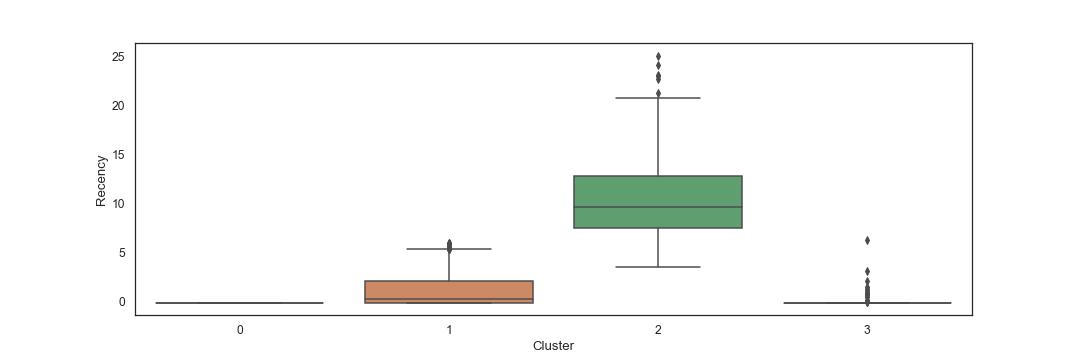

In [98]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Cluster', y='Recency', data=df_rfm_normalizado)
plt.savefig("graph5.png")
Image("graph5.png")

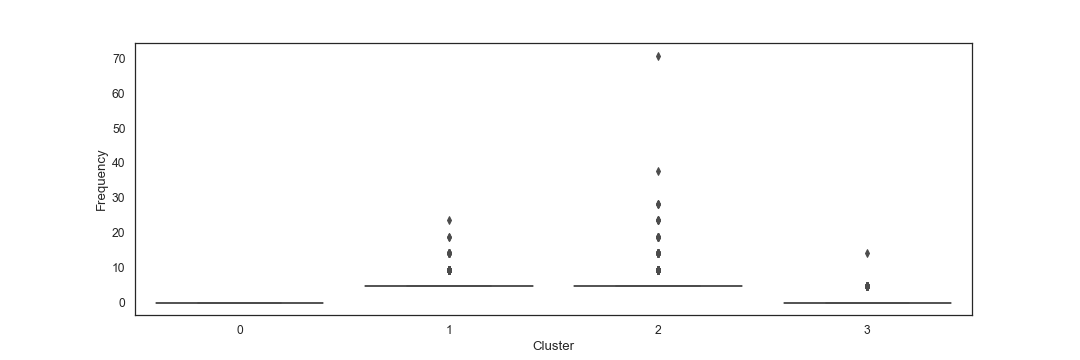

In [99]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Cluster', y='Frequency', data=df_rfm_normalizado)
plt.savefig("graph6.png")
Image("graph6.png")

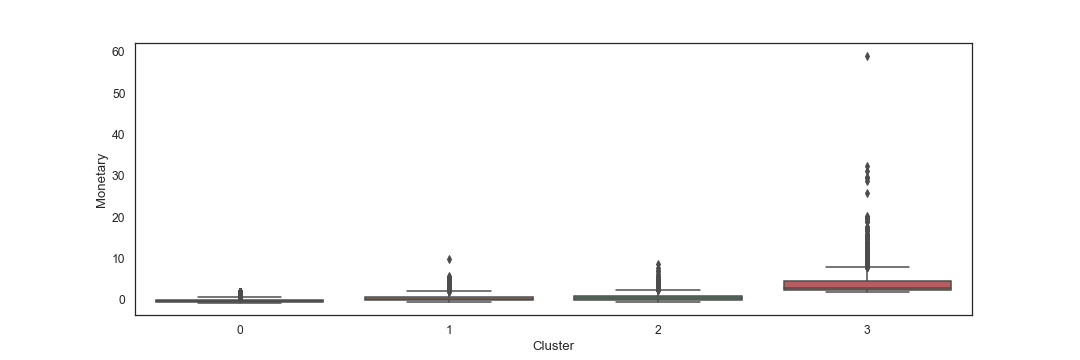

In [100]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Cluster', y='Monetary', data=df_rfm_normalizado)
plt.savefig("graph7.png")
Image("graph7.png")

* Cluster 0: São Clientes que efetuaram uma única compra de baixo valor monetário;

* Cluster 1: Geralmente são clientes que realizaram mais de uma compra num período espaçado com valor de compra intermediário;

* Cluster 2: Geralmente são clientes que realizaram mais de uma compra num período espaçado maior e com valor de compra maior em relação ao Cluster 1;

* Cluster 3: Geralmente são clientes que efetuaram uma única compra de alto valor monetário;


Clientes mais valiosos:
    * Será considerado os clientes pertencentes aos clusteres 2 e 3 como os mais valiosos para o négocio.

## 5.4 Concatenação df com clusters

In [101]:
df_rfm['Cluster'] = kmeans_labels
df_rfm.reset_index()

<ipython-input-101-76a5b4af70e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['Cluster'] = kmeans_labels


,customer_unique_id,Recency,Frequency,Monetary,Cluster
0,0a0a92112bd4c708ca5fde585afaa872,1,1,13664.08,3
1,da122df9eeddfedc1dc1f5349a1a690c,1,2,7571.63,3
2,763c8b1c9c68a0229c42c9fc6f662b93,1,1,7274.88,3
3,dc4802a71eae9be1dd28f5d788ceb526,1,1,6929.31,3
4,459bef486812aa25204be022145caa62,1,1,6922.21,3
...,...,...,...,...,...
95415,2878e5b88167faab17d4fb83a986d38b,1,1,11.63,0
95416,6f5b9d1cdccc4d28f0483a612edecacf,1,1,11.63,0
95417,b33336f46234b24a613ad9064d13106d,1,1,10.89,0
95418,bd06ce0e06ad77a7f681f1a4960a3cc6,1,1,10.07,0


In [102]:
resultado

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer,TotalValue,Year,Month,Semester,order_purchase_timestamp2
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,28013.0,-21.758076,-41.312633,campos dos goytacazes,RJ,72.19,2017,9,2,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,15775.0,-20.212393,-50.941471,santa fe do sul,SP,259.83,2017,4,1,2017-04-26 10:53:06
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,35661.0,-19.860439,-44.597972,pará de minas,MG,216.87,2018,1,1,2018-01-14 14:33:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,12952.0,-23.144923,-46.539830,atibaia,SP,25.78,2018,8,2,2018-08-08 10:00:35
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,13226.0,-23.249008,-46.824961,varzea paulista,SP,218.04,2017,2,1,2017-02-04 13:57:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,65077.0,-2.490420,-44.303287,sao luis,MA,343.40,2018,4,1,2018-04-23 13:57:06
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,81690.0,-25.601485,-49.317700,curitiba,PR,386.53,2018,7,2,2018-07-14 10:26:46
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,4039.0,-23.597813,-46.650272,sao paulo,SP,116.85,2017,10,2,2017-10-23 17:07:56
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,13289.0,-23.036935,-46.982526,vinhedo,SP,64.71,2017,8,2,2017-08-14 23:02:59


In [103]:
resultado = resultado.merge(df_rfm, left_on='customer_unique_id', right_on='customer_unique_id',  how = 'left')
resultado

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,geolocation_state_customer,TotalValue,Year,Month,Semester,order_purchase_timestamp2,Recency,Frequency,Monetary,Cluster
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,RJ,72.19,2017,9,2,2017-09-13 08:59:02,1,1,72.19,0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,SP,259.83,2017,4,1,2017-04-26 10:53:06,145,2,284.56,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,MG,216.87,2018,1,1,2018-01-14 14:33:31,1,1,216.87,0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,SP,25.78,2018,8,2,2018-08-08 10:00:35,1,1,25.78,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,SP,218.04,2017,2,1,2017-02-04 13:57:51,1,1,218.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,MA,343.40,2018,4,1,2018-04-23 13:57:06,1,1,343.40,0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,PR,386.53,2018,7,2,2018-07-14 10:26:46,1,1,386.53,0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,SP,116.85,2017,10,2,2017-10-23 17:07:56,1,1,116.85,0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,SP,64.71,2017,8,2,2017-08-14 23:02:59,1,1,64.71,0


# 6.0 Análise de dados

O objetivo dessa análise de dados é 

Avaliar produtos de lojas que apresentaram baixa performance com relação aos critérios: 
 1) Avaliação da Loja;
 2) Relação Distancia cliente-fornecedor / Frete ;
 3) Valor do Produto


## 6.1 Calculo distancia cliente-fornecedor

In [104]:
resultado.isnull().sum()

order_id                                    0
order_item_id                               0
product_id                                  0
seller_id                                   0
shipping_limit_date                         0
price                                       0
freight_value                               0
customer_id                                 0
order_status                                0
order_purchase_timestamp                    0
order_approved_at                          15
order_delivered_carrier_date             1194
order_delivered_customer_date            2454
order_estimated_delivery_date               0
review_id                                1525
review_score                             1525
review_comment_title                    99266
review_comment_message                  65471
review_creation_date                     1525
review_answer_timestamp                  1525
customer_unique_id                          0
customer_zip_code_prefix          

Há valores nulos, nas colunas de score dos pedidos, latitude e longitude dos fornecedores e clientes. Linhas que contenham valores nulos para essa colunas serão removidas:

In [105]:
resultado = resultado.dropna(subset=['review_score', 'geolocation_lat_seller','geolocation_lng_seller','geolocation_lat_customer','geolocation_lng_customer'])

In [106]:
resultado.isnull().sum()

order_id                                    0
order_item_id                               0
product_id                                  0
seller_id                                   0
shipping_limit_date                         0
price                                       0
freight_value                               0
customer_id                                 0
order_status                                0
order_purchase_timestamp                    0
order_approved_at                          15
order_delivered_carrier_date             1157
order_delivered_customer_date            2305
order_estimated_delivery_date               0
review_id                                   0
review_score                                0
review_comment_title                    97264
review_comment_message                  63625
review_creation_date                        0
review_answer_timestamp                     0
customer_unique_id                          0
customer_zip_code_prefix          

In [107]:
!pip install haversine

In [108]:
import haversine as hs

In [109]:
def distancia_cliente_fornecedor2(lat1,lon1,lat2,lon2):

    coords_1 = (lat1, lon1)
    coords_2 = (lat2, lon2)

    distancia = hs.haversine(coords_1,coords_2)
    return distancia

In [110]:
distancias = []
for i in range(0,len(resultado)):

    l1 = float(resultado.geolocation_lat_seller.iloc[i])
    l2 = float(resultado.geolocation_lng_seller.iloc[i])
    l3 = float(resultado.geolocation_lat_customer.iloc[i])
    l4 = float(resultado.geolocation_lng_customer.iloc[i])
    dist = distancia_cliente_fornecedor2(l1,l2,l3,l4)
    distancias.append(dist)

distancias


[301.00608005157926,
 589.274954243639,
 312.4954776986041,
 301.9521704023522,
 646.2226808282843,
 161.59796932009192,
 484.1188405510463,
 547.4734207839555,
 52.440566925820704,
 33.15987381878875,
 154.94854134345033,
 318.30851026923074,
 566.1248702481921,
 397.4859848960196,
 397.4859848960196,
 866.0631533014702,
 78.61911557811888,
 37.66741130377592,
 248.4794917251544,
 392.1533826914118,
 21.890664784663134,
 318.05083191866265,
 257.960785648027,
 502.55965180378354,
 340.21404962547314,
 685.8712693248792,
 105.23930837966158,
 848.650336791065,
 70.41836874480443,
 128.44830832422076,
 644.2472686285364,
 720.0781214617069,
 339.3173672765512,
 780.1979971794515,
 574.6466474802797,
 1193.7499139074555,
 1445.8745127184834,
 169.43713887560463,
 437.19335795479805,
 1076.679904927349,
 1076.679904927349,
 1076.679904927349,
 48.013227201010665,
 596.014978582429,
 309.38638582646564,
 8.993593406909397,
 8.993593406909397,
 1615.5962032664286,
 548.2808674980885,
 435.4

In [111]:
df_distancias = pd.DataFrame(np.array(distancias), columns=['Distance']) 
df_distancias

,Distance
0,301.006080
1,589.274954
2,312.495478
3,301.952170
4,646.222681
...,...
110577,2755.318291
110578,354.849343
110579,338.827686
110580,72.870577


In [112]:
resultado = pd.concat([resultado, df_distancias], axis=1, join="inner")
resultado

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,TotalValue,Year,Month,Semester,order_purchase_timestamp2,Recency,Frequency,Monetary,Cluster,Distance
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,72.19,2017,9,2,2017-09-13 08:59:02,1,1,72.19,0,301.006080
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,259.83,2017,4,1,2017-04-26 10:53:06,145,2,284.56,1,589.274954
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,216.87,2018,1,1,2018-01-14 14:33:31,1,1,216.87,0,312.495478
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,25.78,2018,8,2,2018-08-08 10:00:35,1,1,25.78,0,301.952170
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,218.04,2017,2,1,2017-02-04 13:57:51,1,1,218.04,0,646.222681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110577,fb415a86a28d4698a9be26d2e871d31c,1,aed75ad669fbebd5a385ac7cc2ae7573,17f51e7198701186712e53a39c564617,2017-10-31 22:49:21,550.00,135.40,7087346b1fd0a0ab1ee23d86b692b132,delivered,2017-10-16 21:57:17,...,685.40,2017,10,2,2017-10-16 21:57:17,1,1,685.40,3,2755.318291
110578,fb434a316418f41addb2ed20a04d5050,1,3cce0d166c3fb2507956c630c1d0f87c,95e03ca3d4146e4011985981aeb959b9,2017-12-07 20:39:42,79.90,15.32,fb1bc88739493ba4c50529dbb998a628,delivered,2017-11-27 20:30:30,...,95.22,2017,11,2,2017-11-27 20:30:30,1,1,190.44,0,354.849343
110579,fb434a316418f41addb2ed20a04d5050,2,3cce0d166c3fb2507956c630c1d0f87c,95e03ca3d4146e4011985981aeb959b9,2017-12-07 20:39:42,79.90,15.32,fb1bc88739493ba4c50529dbb998a628,delivered,2017-11-27 20:30:30,...,95.22,2017,11,2,2017-11-27 20:30:30,1,1,190.44,0,338.827686
110580,fb436a0beef49b493351afe287150239,1,e7d5464b94c9a5963f7c686fc80145ad,58f1a6197ed863543e0136bdedb3fce2,2018-07-05 12:31:13,139.00,22.90,fab1deb9a9ec207df528ba82a18d848a,delivered,2018-06-28 12:19:32,...,161.90,2018,6,1,2018-06-28 12:19:32,1,1,161.90,0,72.870577


## 6.2 Calculo da média da avaliação por produto e por pedido:

Ao final de cada compra os clientes avaliam o pedido e não a loja/produto. Para inferir a avaliação do produto por loja, será calculado a média dos scores por produto e loja para cada cliente.

### 6.2.1 Por pedido

In [113]:
df_ava = resultado.groupby('order_id').agg({'review_score':np.mean})
df_ava.reset_index()
df_ava = df_ava.rename(columns={'review_score': 'review_score_pedido'})
df_ava

,review_score_mean
order_id,
00010242fe8c5a6d1ba2dd792cb16214,5.0
00018f77f2f0320c557190d7a144bdd3,4.0
000229ec398224ef6ca0657da4fc703e,5.0
00024acbcdf0a6daa1e931b038114c75,4.0
00042b26cf59d7ce69dfabb4e55b4fd9,5.0
...,...
fb3ed0c8db7703fbb2d80419bfa7576a,1.0
fb415a86a28d4698a9be26d2e871d31c,5.0
fb434a316418f41addb2ed20a04d5050,3.0


In [114]:
resultado = pd.merge(left = resultado, right = df_ava, how = 'left', on = 'order_id')
resultado

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,Year,Month,Semester,order_purchase_timestamp2,Recency,Frequency,Monetary,Cluster,Distance,review_score_mean
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017,9,2,2017-09-13 08:59:02,1,1,72.19,0,301.006080,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017,4,1,2017-04-26 10:53:06,145,2,284.56,1,589.274954,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018,1,1,2018-01-14 14:33:31,1,1,216.87,0,312.495478,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018,8,2,2018-08-08 10:00:35,1,1,25.78,0,301.952170,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017,2,1,2017-02-04 13:57:51,1,1,218.04,0,646.222681,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108550,fb415a86a28d4698a9be26d2e871d31c,1,aed75ad669fbebd5a385ac7cc2ae7573,17f51e7198701186712e53a39c564617,2017-10-31 22:49:21,550.00,135.40,7087346b1fd0a0ab1ee23d86b692b132,delivered,2017-10-16 21:57:17,...,2017,10,2,2017-10-16 21:57:17,1,1,685.40,3,2755.318291,5.0
108551,fb434a316418f41addb2ed20a04d5050,1,3cce0d166c3fb2507956c630c1d0f87c,95e03ca3d4146e4011985981aeb959b9,2017-12-07 20:39:42,79.90,15.32,fb1bc88739493ba4c50529dbb998a628,delivered,2017-11-27 20:30:30,...,2017,11,2,2017-11-27 20:30:30,1,1,190.44,0,354.849343,3.0
108552,fb434a316418f41addb2ed20a04d5050,2,3cce0d166c3fb2507956c630c1d0f87c,95e03ca3d4146e4011985981aeb959b9,2017-12-07 20:39:42,79.90,15.32,fb1bc88739493ba4c50529dbb998a628,delivered,2017-11-27 20:30:30,...,2017,11,2,2017-11-27 20:30:30,1,1,190.44,0,338.827686,3.0
108553,fb436a0beef49b493351afe287150239,1,e7d5464b94c9a5963f7c686fc80145ad,58f1a6197ed863543e0136bdedb3fce2,2018-07-05 12:31:13,139.00,22.90,fab1deb9a9ec207df528ba82a18d848a,delivered,2018-06-28 12:19:32,...,2018,6,1,2018-06-28 12:19:32,1,1,161.90,0,72.870577,5.0


### 6.2.1 Por produto

In [190]:
df_score_produto = resultado.groupby(['seller_id', 'product_id','customer_unique_id']).agg({'review_score':np.mean})
df_score_produto = df_score_produto.rename(columns={'review_score': 'review_score_produto'})
df_score_produto = df_score_produto.reset_index()
df_score_produto 

,seller_id,product_id,customer_unique_id,review_score_produto
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,3c7e305796add66698959fc7ad176f6b,5.0
1,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,9915eb9f74b6c11aaf04833f65b00e93,5.0
2,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,9de5797cddb92598755a0f76383ddbbb,1.0
3,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,04c08b11822a7d91116c2367d363413c,5.0
4,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,062933ff315c2b7a8c4a302a115be4c4,5.0
...,...,...,...,...
98384,ffff564a4f9085cd26170f4732393726,dbd024d4182504993ad1e3cd2ee9d9e9,051bc94e9cd865806bba8eeefb336d0a,1.0
98385,ffff564a4f9085cd26170f4732393726,dbd024d4182504993ad1e3cd2ee9d9e9,c5cf9357698d4fbca794731fe22b1606,1.0
98386,ffff564a4f9085cd26170f4732393726,de6517dda8e49774f58c07f80abc8d7a,08da95f931937b2c20f5225f2e6c93b0,5.0
98387,ffff564a4f9085cd26170f4732393726,e20b58fe57d487f33247e6cc1154eb9c,a8d60a569c218a4d8bbc03271b5e5b25,1.0


In [193]:
resultado = pd.merge(left = resultado, right = df_score_produto, how = 'left', on = ['seller_id', 'product_id','customer_unique_id'])
resultado

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,Month,Semester,order_purchase_timestamp2,Recency,Frequency,Monetary,Cluster,Distance,review_score_mean,review_score_produto
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,9,2,2017-09-13 08:59:02,1,1,72.19,0,301.006080,5.0,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,4,1,2017-04-26 10:53:06,145,2,284.56,1,589.274954,4.0,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,1,1,2018-01-14 14:33:31,1,1,216.87,0,312.495478,5.0,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,8,2,2018-08-08 10:00:35,1,1,25.78,0,301.952170,4.0,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2,1,2017-02-04 13:57:51,1,1,218.04,0,646.222681,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108550,fb415a86a28d4698a9be26d2e871d31c,1,aed75ad669fbebd5a385ac7cc2ae7573,17f51e7198701186712e53a39c564617,2017-10-31 22:49:21,550.00,135.40,7087346b1fd0a0ab1ee23d86b692b132,delivered,2017-10-16 21:57:17,...,10,2,2017-10-16 21:57:17,1,1,685.40,3,2755.318291,5.0,5.0
108551,fb434a316418f41addb2ed20a04d5050,1,3cce0d166c3fb2507956c630c1d0f87c,95e03ca3d4146e4011985981aeb959b9,2017-12-07 20:39:42,79.90,15.32,fb1bc88739493ba4c50529dbb998a628,delivered,2017-11-27 20:30:30,...,11,2,2017-11-27 20:30:30,1,1,190.44,0,354.849343,3.0,3.0
108552,fb434a316418f41addb2ed20a04d5050,2,3cce0d166c3fb2507956c630c1d0f87c,95e03ca3d4146e4011985981aeb959b9,2017-12-07 20:39:42,79.90,15.32,fb1bc88739493ba4c50529dbb998a628,delivered,2017-11-27 20:30:30,...,11,2,2017-11-27 20:30:30,1,1,190.44,0,338.827686,3.0,3.0
108553,fb436a0beef49b493351afe287150239,1,e7d5464b94c9a5963f7c686fc80145ad,58f1a6197ed863543e0136bdedb3fce2,2018-07-05 12:31:13,139.00,22.90,fab1deb9a9ec207df528ba82a18d848a,delivered,2018-06-28 12:19:32,...,6,1,2018-06-28 12:19:32,1,1,161.90,0,72.870577,5.0,5.0


## 6.3 Calculo da relação frete / distancia clientes-fornecedor

In [252]:
resultado['Frete por distancia'] = resultado['freight_value']/resultado['Distance']

In [253]:
## Tratando valores de frete/distancia, quando a distancia do fornecedor for zero.
resultado['Frete por distancia'] = resultado['Distance'].apply(lambda x: 0 if x==0 else x)

## 6.3 Separação dataset clientes comuns e clientes valiosos

In [255]:
df_clientes_valiosos = resultado[(resultado['Cluster'] == 2) | (resultado['Cluster'] == 3) ].sort_values(by = 'review_score_mean', ascending = True)
df_clientes_valiosos.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_purchase_timestamp2,Recency,Frequency,Monetary,Cluster,Distance,review_score_mean,review_score_produto,Distancia por frete,Frete por distancia
55039,7f8df73aeab603648dec28a5f6cfadc3,1,145028037adecb27b1a58cf9597676cc,c26a2be5b53b7db6b276280da212a779,2018-02-22 13:10:30,399.00,51.81,90f0014eb4ff7a436c6505ac7dfe2a27,delivered,2018-02-16 13:56:28,...,2018-02-16 13:56:28,1,1,1803.24,3,669.858237,1.0,1.0,0.077345,669.858237
47101,6d0940a8f5fba47562bb14cd97dfd6da,1,ada6a9116c85d8e56232e0a4265d7db9,c004e5ea15737026cecaee0447e00b75,2018-08-16 00:30:16,2350.00,105.12,548692bdcbd6e3683ff306ac9d8418d6,delivered,2018-08-10 00:17:59,...,2018-08-10 00:17:59,1,1,2455.12,3,347.099973,1.0,1.0,0.302852,347.099973
83746,c1e8ab8d063eba72d530b57e5b05f919,1,25c38557cf793876c5abdd5931f922db,5dceca129747e92ff8ef7a997dc4f8ca,2018-03-08 02:16:04,999.00,31.44,cee6c6b0f6ac0f9f8c0830152453c3e2,delivered,2018-03-01 17:29:35,...,2018-03-01 17:29:35,1,1,1030.44,3,619.563072,1.0,1.0,0.050745,619.563072
99508,e5f5689b67b74eb43cb33677b9595f5d,1,d6fe3b4ddecd4a8393c6a1385de3bfb6,7c67e1448b00f6e969d365cea6b010ab,2018-03-23 02:30:22,192.97,39.68,80b7b8a1805fa231354410ca34138c7c,delivered,2018-03-07 17:20:39,...,2018-03-07 17:20:39,1,1,1163.25,3,753.872337,1.0,1.0,0.052635,753.872337
99509,e5f5689b67b74eb43cb33677b9595f5d,2,d6fe3b4ddecd4a8393c6a1385de3bfb6,7c67e1448b00f6e969d365cea6b010ab,2018-03-23 02:30:22,192.97,39.68,80b7b8a1805fa231354410ca34138c7c,delivered,2018-03-07 17:20:39,...,2018-03-07 17:20:39,1,1,1163.25,3,753.872337,1.0,1.0,0.052635,753.872337


In [256]:
df_clientes_comuns = resultado[(resultado['Cluster'] != 2) | (resultado['Cluster'] != 3) ].sort_values(by = 'review_score_mean', ascending = True)
df_clientes_comuns

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_purchase_timestamp2,Recency,Frequency,Monetary,Cluster,Distance,review_score_mean,review_score_produto,Distancia por frete,Frete por distancia
34732,5010ab6b12449f4912c2aa83c16bf2bc,1,cf45cea95e6b4d46e80fe098eda10c8f,cc419e0650a3c5ba77189a1882b7556a,2017-05-18 22:15:10,84.99,14.34,3a11b365f9dc63f1bb29092b36b9add1,delivered,2017-05-13 22:01:22,...,2017-05-13 22:01:22,1,1,99.33,0,433.046390,1.0,1.0,0.033114,433.046390
13611,1f8d7d0c0affce811c7d6f2abf71a7b5,1,2e1b5445dd65296e510e3e8c65ea7071,dbc22125167c298ef99da25668e1011f,2017-08-17 09:25:08,48.90,13.37,79464312f42f788e5138a105761846e4,delivered,2017-08-11 09:11:27,...,2017-08-11 09:11:27,1,1,62.27,0,0.000000,1.0,1.0,inf,0.000000
84411,c3716204ec5bc2bc5593bee858279148,1,cd935d283d47f1050c505e1c39c48b67,a3a38f4affed601eb87a97788c949667,2018-08-06 21:45:18,69.90,18.59,99ae056139c928155fbb6789440c8824,delivered,2018-07-31 21:51:41,...,2018-07-31 21:51:41,1,1,88.49,0,310.292647,1.0,1.0,0.059911,310.292647
13616,1f8f107ec282753323eb8c093b00767c,1,473795a355d29305c3ea6b156833adf5,620c87c171fb2a6dd6e8bb4dec959fc6,2018-01-25 09:08:52,49.90,15.10,2bc7f60e995164669011e304e5db2dae,delivered,2018-01-19 09:07:53,...,2018-01-19 09:07:53,1,1,65.00,0,234.044381,1.0,1.0,0.064518,234.044381
42779,62ffb8b5fc46e6cba7ccb763025fd09c,1,56eb39314ca59c39efa1e28beb073abe,7d76b645482be4a332374e8223836592,2018-03-01 11:28:04,24.90,7.78,a83954b9f4f3c29dd4b886e2d32f0cd9,delivered,2018-02-25 11:09:10,...,2018-02-25 11:09:10,1,1,32.68,0,3.539979,1.0,1.0,2.197753,3.539979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46204,6af1785f8b08c8802cad476fa3590291,1,180fa760feb6277fe75df285149fee2b,7f7b8245c336066a1f9933c359f11d77,2018-06-20 02:54:38,31.90,12.79,5ff50264ef1c7e41b2cc310306819e37,delivered,2018-06-06 00:59:14,...,2018-06-06 00:59:14,1,1,44.69,0,310.616041,5.0,5.0,0.041176,310.616041
46203,6af0f6ba6cda05f0b971bc13793b6166,1,df1ff6c9a263464ba1ea7cd3de5e8633,c68fb906c8f4b4b946d8386bfa6e5467,2018-04-05 18:50:17,23.63,13.71,b9e1a1903d4d56d54b6dda7762dba719,delivered,2018-03-31 18:08:33,...,2018-03-31 18:08:33,1,1,37.34,0,473.116720,5.0,5.0,0.028978,473.116720
46202,6af0669bfc3cbdfbc6559919441da2e8,1,846145e9b8d412bd1c9bb478a52ab4a0,432c37c9dfba871172ec162e20118b8c,2017-11-29 22:12:35,29.00,16.79,899d314e0ceb5d259c42293077eb5102,delivered,2017-11-23 21:41:25,...,2017-11-23 21:41:25,1,1,45.79,0,415.491719,5.0,5.0,0.040410,415.491719
46214,6af8d729a1717c4ba85c7bdc83278656,1,cad39e71c0fe2f6ce875040d4ac43a4b,4869f7a5dfa277a7dca6462dcf3b52b2,2017-08-18 16:50:07,350.00,13.95,1c0914076686517cb711e05022ff9d7f,delivered,2017-08-10 16:33:10,...,2017-08-10 16:33:10,1,1,363.95,0,883.107616,5.0,5.0,0.015796,883.107616


## 6.4 Avaliação por cliente comum e clientes valiosos

In [257]:
df_clientes_valiosos.describe()

,order_item_id,price,freight_value,review_score,customer_zip_code_prefix,seller_zip_code_prefix,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_zip_code_prefix_customer,...,Semester,Recency,Frequency,Monetary,Cluster,Distance,review_score_mean,review_score_produto,Distancia por frete,Frete por distancia
count,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,...,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000,6279.000000
mean,1.670170,508.374432,37.283595,3.841535,38622.174232,28988.055104,28988.055104,-22.650854,-46.930808,38622.174232,...,1.445772,78.386049,1.501672,923.218356,2.715719,592.110564,3.841535,3.841535,inf,592.110564
std,1.574927,547.771949,38.370992,1.531829,30010.762323,30056.049559,30056.049559,3.367739,3.030075,30010.762323,...,0.497090,132.644608,1.190767,827.561840,0.451107,574.974690,1.531829,1.529166,NaN,574.974690
min,1.000000,3.490000,0.000000,1.000000,1009.000000,1001.000000,1001.000000,-30.159469,-63.887973,1009.000000,...,1.000000,1.000000,1.000000,54.150000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,105.000000,16.550000,3.000000,13206.000000,8260.000000,8260.000000,-23.603187,-48.747657,13206.000000,...,1.000000,1.000000,1.000000,603.280000,2.000000,193.179756,3.000000,3.000000,0.027996,193.179756
50%,1.000000,299.000000,23.490000,5.000000,29090.000000,14580.000000,14580.000000,-23.422076,-46.717376,29090.000000,...,1.000000,1.000000,1.000000,759.490000,3.000000,431.018567,5.000000,5.000000,0.064679,431.018567
75%,2.000000,738.450000,42.490000,5.000000,65311.000000,37580.000000,37580.000000,-21.787360,-46.399037,65311.000000,...,2.000000,170.000000,2.000000,1076.760000,3.000000,795.687037,5.000000,5.000000,0.196041,795.687037
max,20.000000,6735.000000,409.680000,5.000000,99750.000000,99300.000000,99300.000000,-2.546079,-34.847856,99750.000000,...,2.000000,633.000000,16.000000,13664.080000,3.000000,3306.865774,5.000000,5.000000,inf,3306.865774


In [258]:
df_clientes_comuns.describe()

,order_item_id,price,freight_value,review_score,customer_zip_code_prefix,seller_zip_code_prefix,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_zip_code_prefix_customer,...,Semester,Recency,Frequency,Monetary,Cluster,Distance,review_score_mean,review_score_produto,Distancia por frete,Frete por distancia
count,108555.000000,108555.000000,108555.000000,108555.000000,108555.000000,108555.000000,108555.000000,108555.000000,108555.000000,108555.000000,...,108555.000000,108555.000000,108555.000000,108555.000000,108555.000000,108555.000000,108555.000000,108555.000000,1.085550e+05,108555.000000
mean,1.196186,120.729792,19.985162,4.034038,35021.026917,24442.961568,24442.961568,-22.801060,-47.234393,35021.026917,...,1.436820,7.068564,1.077491,192.563049,0.200940,596.780151,4.034038,4.034038,inf,596.780151
std,0.693650,182.939787,15.838840,1.386968,29861.617786,27611.893310,27611.893310,2.698930,2.340872,29861.617786,...,0.495995,38.269071,0.387525,293.993059,0.664713,591.548572,1.386968,1.384911,NaN,591.548572
min,1.000000,0.850000,0.000000,1.000000,1003.000000,1001.000000,1001.000000,-36.605374,-67.809656,1003.000000,...,1.000000,1.000000,1.000000,9.590000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000
25%,1.000000,39.900000,13.050000,4.000000,11075.000000,6429.000000,6429.000000,-23.610305,-48.831547,11075.000000,...,1.000000,1.000000,1.000000,67.720000,0.000000,182.740306,4.000000,4.000000,1.994523e-02,182.740306
50%,1.000000,74.990000,16.250000,5.000000,24230.000000,13568.000000,13568.000000,-23.422313,-46.746920,24230.000000,...,1.000000,1.000000,1.000000,119.450000,0.000000,431.318495,5.000000,5.000000,3.989006e-02,431.318495
75%,1.000000,134.990000,21.150000,5.000000,58415.000000,27930.000000,27930.000000,-21.766477,-46.518082,58415.000000,...,2.000000,1.000000,1.000000,208.040000,0.000000,792.056302,5.000000,5.000000,1.102911e-01,792.056302
max,21.000000,6735.000000,409.680000,5.000000,99990.000000,99730.000000,99730.000000,-2.546079,-34.847856,99990.000000,...,2.000000,633.000000,16.000000,13664.080000,3.000000,8736.959686,5.000000,5.000000,inf,8736.959686


<ipython-input-259-2034ce8f6c1c>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,5))


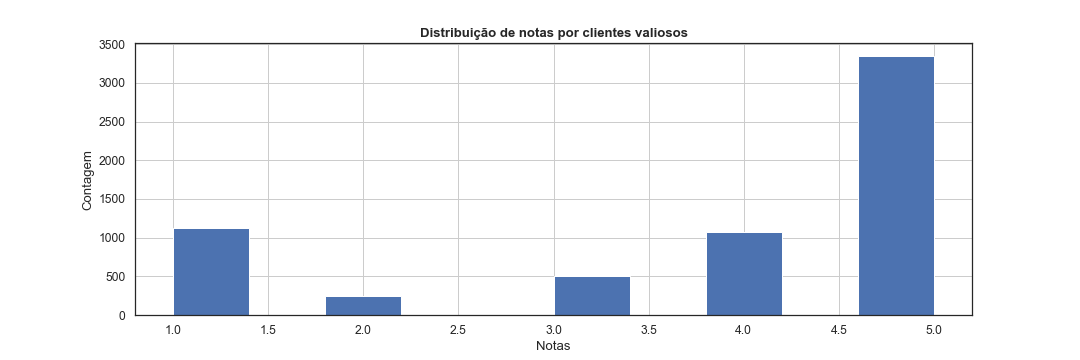

In [259]:
plt.figure(figsize=(15,5))
df_clientes_valiosos.review_score_mean.hist()
plt.xlabel('Notas')
plt.ylabel('Contagem')
plt.title('Distribuição de notas por clientes valiosos',fontweight='bold')
plt.savefig("graph8.png")
Image("graph8.png")

<ipython-input-260-7e41a8a6c036>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,5))


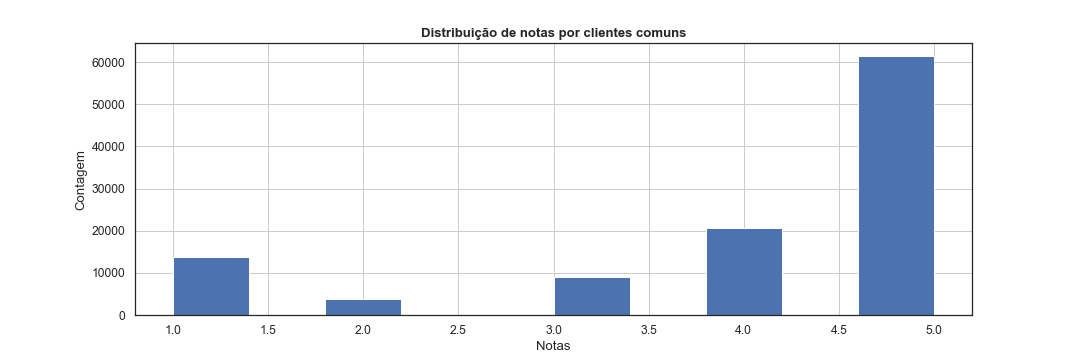

In [260]:
plt.figure(figsize=(15,5))
df_clientes_comuns.review_score_mean.hist()
plt.xlabel('Notas')
plt.ylabel('Contagem')
plt.title('Distribuição de notas por clientes comuns',fontweight='bold')
plt.savefig("graph9.png")
Image("graph9.png")



 * Aparentemente a distribuição de notas de avaliações em clientes valiosos e não valiosos são muito semelhantes.

# 7. Produtos e fornecedores críticos: Analise produtos e fornecedores com baixa performance entre os clientes mais valiosos

## 7.1 Avaliação

In [262]:
df_clientes_valiosos.loc[:,['customer_id','customer_unique_id','seller_id','product_id','review_score_produto','price','Frete por distancia']].sort_values(by =['review_score_produto'])

,customer_id,customer_unique_id,seller_id,product_id,review_score_produto,price,Frete por distancia
55039,90f0014eb4ff7a436c6505ac7dfe2a27,f3140df89d24aa120f087331fe18f773,c26a2be5b53b7db6b276280da212a779,145028037adecb27b1a58cf9597676cc,1.0,399.00,669.858237
68515,cb87122c4871e202777cf243fbea2d12,93bc212addb25a5f5139fded3c2ee6b3,25c5c91f63607446a97b143d2d535d31,54d7ad85b648d3cb2b7069ed446d7f35,1.0,149.91,961.917840
2425,ef48ea66fb39a13e1310b36b676e29e7,98af4f1390402d0565507f23c89c76c0,278b6e0b20c4f61fefaa0577943d7a35,87f87c717c93f801e1a62367ce5ff63f,1.0,539.00,454.054757
2424,ef48ea66fb39a13e1310b36b676e29e7,98af4f1390402d0565507f23c89c76c0,278b6e0b20c4f61fefaa0577943d7a35,87f87c717c93f801e1a62367ce5ff63f,1.0,539.00,373.628374
59458,764fb80689629a0092fa11ada23a0c4e,2c90fdbc33c7a6f301f4c63f0c962b3f,cd68562d3f44870c08922d380acae552,52690beab08122aee391378fbf246a58,1.0,485.00,318.371128
...,...,...,...,...,...,...,...
82946,0c24eb9748620ef4c1a57fbcb77f5ff6,d4bfb52232b293647e88915939ceb6ca,4869f7a5dfa277a7dca6462dcf3b52b2,15d9c7e1411ece24a0053b1e876e4d4c,5.0,688.00,228.000980
83308,f171e6f892727d44d9df7d93ab570b7f,4e65032f1f574189fb793bac5a867bbc,e627629ba868740e287800f1a9be81c2,7643f9ef2cbf1bd4202b0b7dcc500cad,5.0,21.90,2259.368008
83370,80ae4efaefbd76dc1756c55accb67119,876a262de02307eaa2e7c5c07627d850,fa1c13f2614d7b5c4749cbc52fecda94,38c56c5c5b16958d95bf8254498ad555,5.0,799.00,463.298798
85063,63bd88b83df0481864b79579cd2d7f6b,af53f59538b3c60899f492ca03b8c85d,989becdce12ebc39863c2bceab6f3ca1,3880d25d502b15b1de6fddc42ad1d67a,5.0,1199.00,329.541351


In [310]:
table = pd.pivot_table(df_clientes_valiosos, values=['customer_id','price','Frete por distancia'], index=['seller_id','product_id', 'review_score_produto'],
                    aggfunc={'customer_id': 'nunique','price': np.mean, 'Frete por distancia': np.mean })
table = table.reset_index()
table = table.rename(columns={'customer_id': 'ocorrencias', 'price': 'valor unitario'})
table.sort_values(by = ['review_score_produto','ocorrencias','valor unitario','Frete por distancia'],  ascending=[True,False,False,False])

,seller_id,product_id,review_score_produto,Frete por distancia,ocorrencias,valor unitario
1393,5dceca129747e92ff8ef7a997dc4f8ca,25c38557cf793876c5abdd5931f922db,1.0,728.631056,13,1030.658462
1663,712e6ed8aa4aa1fa65dab41fed5737e4,1dec4c88c685d5a07bf01dcb0f8bf9f8,1.0,914.179097,13,572.846154
2700,b1b3948701c5c72445495bd161b83a4c,fd0065af7f09af4b82a0ca8f3eed1852,1.0,781.330924,10,1999.990000
1196,522620dcb18a6b31cd7bdf73665113a9,fb01a5fc09b9b9563c2ee41a22f07d54,1.0,268.505195,8,689.890000
1236,53243585a1d6dc2643021fd1853d8905,a04087ab6a96ffa041f8a2701a72b616,1.0,400.622351,5,630.833333
...,...,...,...,...,...,...
747,2c9e548be18521d1c43cde1c582c6de8,9007d9a8a0d332c61d9dd611fa341f4b,5.0,753.867748,1,7.900000
1445,609e1a9a6c2539919b8205cf7c4e6ff0,8c6d562d9dde3d9658cf7496f61c1bc0,5.0,460.413311,1,7.900000
2801,b76dba6c951ab00dc4edf0a1aa88037e,91b08d34d0ba4db44da2dc382867ba49,5.0,2138.991356,1,6.900000
274,1127b7f2594683f2510f1c2c834a486b,50504a602afeb7a2822ea65f1bed8f36,5.0,459.795575,1,6.350000


In [314]:
table[(table['review_score_produto'] <= 3)].sort_values(by = ['ocorrencias'],  ascending=[False])        

,seller_id,product_id,review_score_produto,Frete por distancia,ocorrencias,valor unitario
1393,5dceca129747e92ff8ef7a997dc4f8ca,25c38557cf793876c5abdd5931f922db,1.0,728.631056,13,1030.658462
1663,712e6ed8aa4aa1fa65dab41fed5737e4,1dec4c88c685d5a07bf01dcb0f8bf9f8,1.0,914.179097,13,572.846154
2700,b1b3948701c5c72445495bd161b83a4c,fd0065af7f09af4b82a0ca8f3eed1852,1.0,781.330924,10,1999.990000
1196,522620dcb18a6b31cd7bdf73665113a9,fb01a5fc09b9b9563c2ee41a22f07d54,1.0,268.505195,8,689.890000
1665,712e6ed8aa4aa1fa65dab41fed5737e4,1dec4c88c685d5a07bf01dcb0f8bf9f8,3.0,440.537516,5,565.000000
...,...,...,...,...,...,...
1221,53243585a1d6dc2643021fd1853d8905,1e5428c428e0f783acd6e3d94ba4ee2a,1.0,1071.886844,1,599.000000
1226,53243585a1d6dc2643021fd1853d8905,588531f8ec37e7d5ff5b7b22ea0488f8,1.0,170.137751,1,1300.000000
1241,53243585a1d6dc2643021fd1853d8905,a5215a7a9f46c4185b12f38e9ddf2abc,3.0,620.513607,1,1340.000000
1252,53243585a1d6dc2643021fd1853d8905,d6160fb7873f184099d9bc95e30376af,2.0,513.898025,1,1299.900000


# 8.0 Conclusões e Recomendações 

Há um risco grande ruptura de clientes que são considerados valiosos para o negócio quando há uma recorrência de experiências negativas comprando na plataforma Olist.

A fim de fidelizar o cliente e diminuir a probabilidade de ruptura das compras na plataforma foi identificado os principais agressores, listando nominalmente os fornecedores e produtos que causaram maiores experiencias negativas para os clientes de maior valor para o negócio.

Entende-se como uma experiência negativa a compra de um produto que não corresponde as expectativas do cliente. Esse indicador foi mensurado inferindo uma avaliação de produtos por fornecedor a partir da resposta do questionário de avaliação de pedidos.

Recomenda-se que haja uma notificação aos fornecedores informando-lhes os produtos que apresentaram baixas avaliações.

Para otimizar as operações, recomendamos que sejam priorizados os produtos que:

1) Tiveram menores notas na avaliação;  
2) Tiveram maiores ocorrências de baixa avaliação;  
3) Possui elevado valor unitário, pois quanto maior o valor unitário maior a decepção do cliente;  
4) Possui elevado valor de Frete/Distância cliente-fornecedor uma vez que é maior o custo logistico nessas operações 


# 9.0 Melhorias e gaps do projeto

A partir desse projeto de clusterização de clientes e análise de dados é possível aprimorar os algorítimos de recomendação para recomendar fornecedores que possuam produtos equivalentes cuja avaliação estejam conformes aos padrões.